<a href="https://colab.research.google.com/github/Jobmrtall/House-Price-Prediction-Using-Linear-Regression-Random-Forest-and-XGBoost/blob/main/House_Price_Prediction_Using_Linear_Regression_%2CRandom_Forest_and_XGBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.pipeline import make_pipeline

In [2]:
train=pd.read_csv('https://raw.githubusercontent.com/Jobmrtall/PRODIGY_ML_01/refs/heads/main/train.csv')
test=pd.read_csv('https://raw.githubusercontent.com/Jobmrtall/PRODIGY_ML_01/refs/heads/main/test.csv')
sample_submission=pd.read_csv('https://raw.githubusercontent.com/Jobmrtall/PRODIGY_ML_01/refs/heads/main/sample_submission.csv')

In [3]:
train.head()
train.tail()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
1455         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1456         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1457         Lvl    AllPub  ...        0    NaN  GdPrv        Shed    2500   
1458         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1459         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
1455      8   2007        WD         Normal     175000  
1456      2   2010        WD         Normal     210000  
1457      5   2010        WD         Normal     266500  
1458      4   2010        WD         Normal     142125  
1459      6   2008        WD         Normal     147500  

[5 rows x 81 columns]

In [4]:
train.isna().sum()
train.dtypes
print(train['MSSubClass'].unique())
print(test['MSSubClass'].unique())

[ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40]
[ 20  60 120 160  80  30  50  90  85 190  45  70  75 180  40 150]


In [5]:
train.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [6]:
train.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [7]:
test.isna().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

In [8]:
missing=train.isna().sum()
missing_values=missing[missing>0]
print(missing_values)
print(missing_values.count())
print(missing_values.sort_values())

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64
19
Electrical         1
MasVnrArea         8
BsmtCond          37
BsmtFinType1      37
BsmtQual          37
BsmtExposure      38
BsmtFinType2      38
GarageType        81
GarageQual        81
GarageFinish      81
GarageCond        81
GarageYrBlt       81
LotFrontage      259
FireplaceQu      690
MasVnrType       872
Fence           1179
Alley           1369
MiscFeature     1406
PoolQC          1453
dtype: int64


In [9]:
merged=pd.concat([train,test],ignore_index=False,keys=['train','test'])
merged

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley  \
train 0        1          60       RL         65.0     8450   Pave   NaN   
      1        2          20       RL         80.0     9600   Pave   NaN   
      2        3          60       RL         68.0    11250   Pave   NaN   
      3        4          70       RL         60.0     9550   Pave   NaN   
      4        5          60       RL         84.0    14260   Pave   NaN   
...          ...         ...      ...          ...      ...    ...   ...   
test  1454  2915         160       RM         21.0     1936   Pave   NaN   
      1455  2916         160       RM         21.0     1894   Pave   NaN   
      1456  2917          20       RL        160.0    20000   Pave   NaN   
      1457  2918          85       RL         62.0    10441   Pave   NaN   
      1458  2919          60       RL         74.0     9627   Pave   NaN   

           LotShape LandContour Utilities  ... PoolArea PoolQC  Fence  \
train 0         Reg         Lvl    AllPub  ...        0    NaN    NaN   
      1         Reg         Lvl    AllPub  ...        0    NaN    NaN   
      2         IR1         Lvl    AllPub  ...        0    NaN    NaN   
      3         IR1         Lvl    AllPub  ...        0    NaN    NaN   
      4         IR1         Lvl    AllPub  ...        0    NaN    NaN   
...             ...         ...       ...  ...      ...    ...    ...   
test  1454      Reg         Lvl    AllPub  ...        0    NaN    NaN   
      1455      Reg         Lvl    AllPub  ...        0    NaN    NaN   
      1456      Reg         Lvl    AllPub  ...        0    NaN    NaN   
      1457      Reg         Lvl    AllPub  ...        0    NaN  MnPrv   
      1458      Reg         Lvl    AllPub  ...        0    NaN    NaN   

           MiscFeature MiscVal MoSold YrSold  SaleType  SaleCondition  \
train 0            NaN       0      2   2008        WD         Normal   
      1            NaN       0      5   2007        WD         Normal   
      2            NaN       0      9   2008        WD         Normal   
      3            NaN       0      2   2006        WD        Abnorml   
      4            NaN       0     12   2008        WD         Normal   
...                ...     ...    ...    ...       ...            ...   
test  1454         NaN       0      6   2006        WD         Normal   
      1455         NaN       0      4   2006        WD        Abnorml   
      1456         NaN       0      9   2006        WD        Abnorml   
      1457        Shed     700      7   2006        WD         Normal   
      1458         NaN       0     11   2006        WD         Normal   

            SalePrice  
train 0      208500.0  
      1      181500.0  
      2      223500.0  
      3      140000.0  
      4      250000.0  
...               ...  
test  1454        NaN  
      1455        NaN  
      1456        NaN  
      1457        NaN  
      1458        NaN  

[2919 rows x 81 columns]

In [10]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2919 entries, ('train', np.int64(0)) to ('test', np.int64(1458))
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual

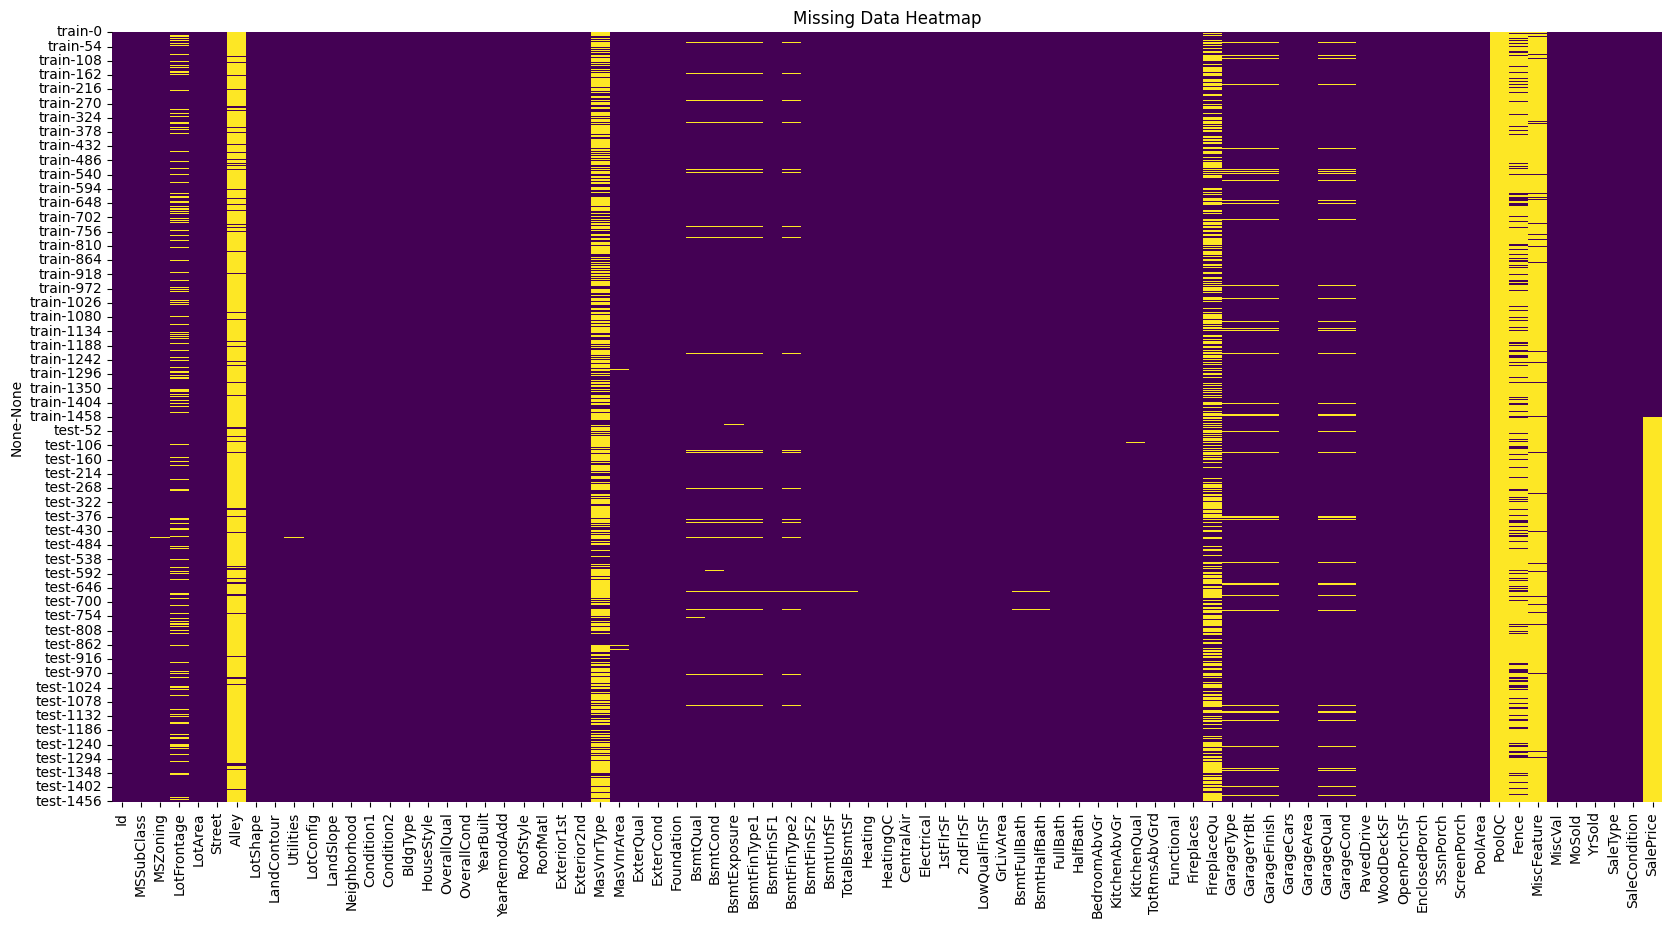

In [11]:
plt.figure(figsize=(20,10))
sns.heatmap(merged.isna(), cbar=False, cmap="viridis")
plt.title("Missing Data Heatmap")
plt.show()

In [12]:
print(merged.isna().sum().sum())
print(merged.count().sum())
print(merged.isna().sum().sum()/merged.count().sum()) #to know how much of the missing data accounts the real data

17166
219273
0.078285972281129


In [13]:
print(len(merged))
merged.isna().sum().sort_values()

2919


Id                0
MSSubClass        0
Street            0
LotArea           0
LotShape          0
               ... 
MasVnrType     1766
Fence          2348
Alley          2721
MiscFeature    2814
PoolQC         2909
Length: 81, dtype: int64

In [14]:
missing=merged.isna().sum()
missing_values= missing[missing>0]
print(missing_values.sort_values())
print(missing_values.count())

Exterior2nd        1
Exterior1st        1
BsmtUnfSF          1
BsmtFinSF2         1
BsmtFinSF1         1
KitchenQual        1
Electrical         1
TotalBsmtSF        1
GarageArea         1
GarageCars         1
SaleType           1
Functional         2
BsmtFullBath       2
Utilities          2
BsmtHalfBath       2
MSZoning           4
MasVnrArea        23
BsmtFinType1      79
BsmtFinType2      80
BsmtQual          81
BsmtCond          82
BsmtExposure      82
GarageType       157
GarageFinish     159
GarageCond       159
GarageYrBlt      159
GarageQual       159
LotFrontage      486
FireplaceQu     1420
SalePrice       1459
MasVnrType      1766
Fence           2348
Alley           2721
MiscFeature     2814
PoolQC          2909
dtype: int64
35


In [15]:
merged[merged['MSZoning'].isna()].index
merged.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice        float64
Length: 81, dtype: object

In [16]:
# since MSSubClass represents the type of dwelling being sold, encoded numerically.
# these numbers arent numeric in the mathimatical sense but rather act as catgorical labels so we will be changing in to a object data type
merged['MSSubClass']= merged['MSSubClass'].astype('object')
# so is also for these specfic columns
merged['OverallQual']= merged['OverallQual'].astype('object')
merged['OverallCond']= merged['OverallCond'].astype('object')
#segeregating month and year in to datetime

merged['MoSold']=pd.to_datetime(merged['MoSold'], format='%m').dt.month
merged['YrSold']=pd.to_datetime(merged['YrSold'],format='%Y').dt.year
merged['YearBuilt']=pd.to_datetime(merged['YearBuilt'],format='%Y').dt.year
merged['YearRemodAdd']=pd.to_datetime(merged['YearRemodAdd'],format='%Y').dt.year

In [17]:
merged[['YrSold','YearBuilt','YearRemodAdd']]

YrSold  YearBuilt  YearRemodAdd
train 0       2008       2003          2003
      1       2007       1976          1976
      2       2008       2001          2002
      3       2006       1915          1970
      4       2008       2000          2000
...            ...        ...           ...
test  1454    2006       1970          1970
      1455    2006       1970          1970
      1456    2006       1960          1996
      1457    2006       1992          1992
      1458    2006       1993          1994

[2919 rows x 3 columns]

In [18]:
#separating those that have na as category not actually a missing value
print(merged['MasVnrType'].unique())
print(merged['BsmtQual'].unique())
print(merged['BsmtCond'].unique())
print(merged['BsmtExposure'].unique())
print(merged['BsmtFinType1'].unique())
print(merged['BsmtFinType2'].unique())
print(merged['FireplaceQu'].unique())
print(merged['GarageType'].unique())
print(merged['GarageFinish'].unique())
print(merged['GarageQual'].unique())
print(merged['GarageCond'].unique())
print(merged['PoolQC'].unique())
print(merged['Fence'].unique())
print(merged['MiscFeature'].unique())
print(merged['Alley'].unique())
fill_none_cols = [
    'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
    'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
    'PoolQC', 'Fence', 'MiscFeature', 'Alley']
merged.fillna({col: 'None_' for col in fill_none_cols}, inplace=True)

['BrkFace' nan 'Stone' 'BrkCmn']
['Gd' 'TA' 'Ex' nan 'Fa']
['TA' 'Gd' nan 'Fa' 'Po']
['No' 'Gd' 'Mn' 'Av' nan]
['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' nan 'LwQ']
['Unf' 'BLQ' nan 'ALQ' 'Rec' 'LwQ' 'GLQ']
[nan 'TA' 'Gd' 'Fa' 'Ex' 'Po']
['Attchd' 'Detchd' 'BuiltIn' 'CarPort' nan 'Basment' '2Types']
['RFn' 'Unf' 'Fin' nan]
['TA' 'Fa' 'Gd' nan 'Ex' 'Po']
['TA' 'Fa' nan 'Gd' 'Po' 'Ex']
[nan 'Ex' 'Fa' 'Gd']
[nan 'MnPrv' 'GdWo' 'GdPrv' 'MnWw']
[nan 'Shed' 'Gar2' 'Othr' 'TenC']
[nan 'Grvl' 'Pave']


In [19]:
merged[merged['GarageType']=='None_']['GarageType']

train  39      None_
       48      None_
       78      None_
       88      None_
       89      None_
               ...  
test   1433    None_
       1449    None_
       1453    None_
       1454    None_
       1457    None_
Name: GarageType, Length: 157, dtype: object

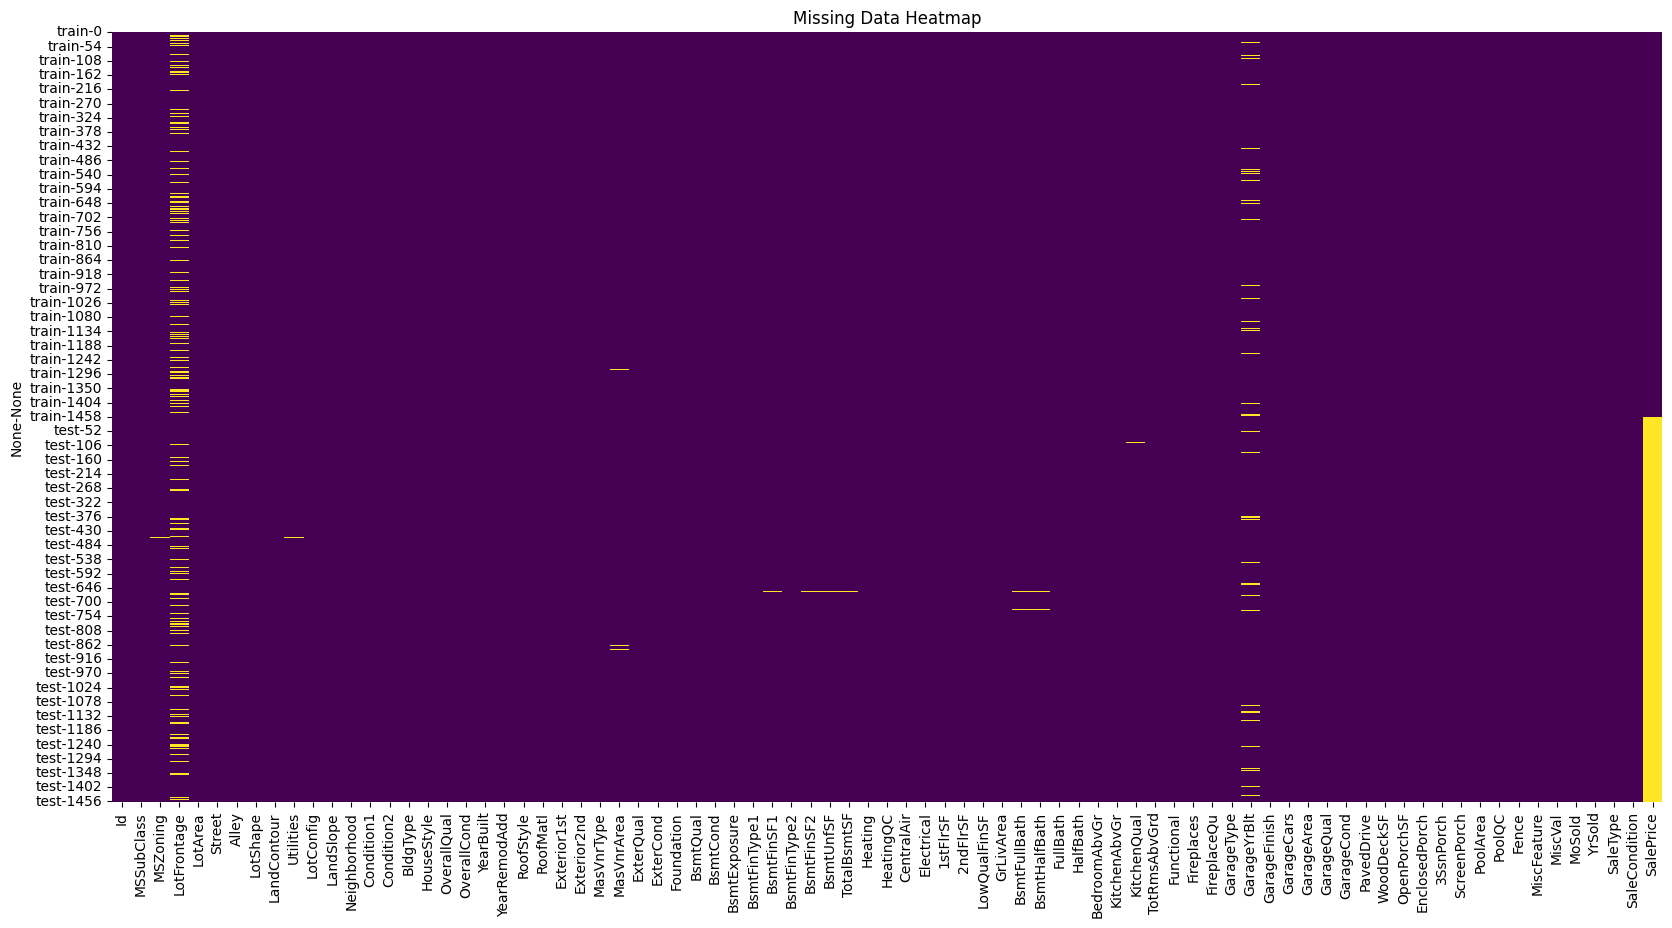

In [20]:
plt.figure(figsize=(20,10))
sns.heatmap(merged.isna(), cbar=False, cmap="viridis")
plt.title("Missing Data Heatmap")
plt.show()

In [21]:
merged

Id MSSubClass MSZoning  LotFrontage  LotArea Street  Alley  \
train 0        1         60       RL         65.0     8450   Pave  None_   
      1        2         20       RL         80.0     9600   Pave  None_   
      2        3         60       RL         68.0    11250   Pave  None_   
      3        4         70       RL         60.0     9550   Pave  None_   
      4        5         60       RL         84.0    14260   Pave  None_   
...          ...        ...      ...          ...      ...    ...    ...   
test  1454  2915        160       RM         21.0     1936   Pave  None_   
      1455  2916        160       RM         21.0     1894   Pave  None_   
      1456  2917         20       RL        160.0    20000   Pave  None_   
      1457  2918         85       RL         62.0    10441   Pave  None_   
      1458  2919         60       RL         74.0     9627   Pave  None_   

           LotShape LandContour Utilities  ... PoolArea PoolQC  Fence  \
train 0         Reg         Lvl    AllPub  ...        0  None_  None_   
      1         Reg         Lvl    AllPub  ...        0  None_  None_   
      2         IR1         Lvl    AllPub  ...        0  None_  None_   
      3         IR1         Lvl    AllPub  ...        0  None_  None_   
      4         IR1         Lvl    AllPub  ...        0  None_  None_   
...             ...         ...       ...  ...      ...    ...    ...   
test  1454      Reg         Lvl    AllPub  ...        0  None_  None_   
      1455      Reg         Lvl    AllPub  ...        0  None_  None_   
      1456      Reg         Lvl    AllPub  ...        0  None_  None_   
      1457      Reg         Lvl    AllPub  ...        0  None_  MnPrv   
      1458      Reg         Lvl    AllPub  ...        0  None_  None_   

           MiscFeature MiscVal MoSold YrSold SaleType SaleCondition  SalePrice  
train 0          None_       0      2   2008       WD        Normal   208500.0  
      1          None_       0      5   2007       WD        Normal   181500.0  
      2          None_       0      9   2008       WD        Normal   223500.0  
      3          None_       0      2   2006       WD       Abnorml   140000.0  
      4          None_       0     12   2008       WD        Normal   250000.0  
...                ...     ...    ...    ...      ...           ...        ...  
test  1454       None_       0      6   2006       WD        Normal        NaN  
      1455       None_       0      4   2006       WD       Abnorml        NaN  
      1456       None_       0      9   2006       WD       Abnorml        NaN  
      1457        Shed     700      7   2006       WD        Normal        NaN  
      1458       None_       0     11   2006       WD        Normal        NaN  

[2919 rows x 81 columns]

In [22]:
#missing managmnet is going to be through imputing
# so selcting those missng values that are object and numeric type while excluding GarageYrBlt since it is datetime type
#  LotFrontage is also going to included eventhough it has the highest number of missing values next to GarageYrBlt
columns = ['Exterior1st','BsmtFinSF2','BsmtFinSF1','Exterior2nd','KitchenQual','Electrical','TotalBsmtSF','BsmtUnfSF','GarageArea','SaleType','GarageCars','BsmtFullBath','Functional','BsmtHalfBath','Utilities','MSZoning','MasVnrArea','LotFrontage']
merged[merged[columns].isna().any(axis=1)]

Id MSSubClass MSZoning  LotFrontage  LotArea Street  Alley  \
train 7        8         60       RL          NaN    10382   Pave  None_   
      12      13         20       RL          NaN    12968   Pave  None_   
      14      15         20       RL          NaN    10920   Pave  None_   
      16      17         20       RL          NaN    11241   Pave  None_   
      24      25         20       RL          NaN     8246   Pave  None_   
...          ...        ...      ...          ...      ...    ...    ...   
test  1402  2863         20       RL         75.0     8050   Pave  None_   
      1440  2901         20       RL          NaN    50102   Pave  None_   
      1441  2902         20       RL          NaN     8098   Pave  None_   
      1444  2905         20      NaN        125.0    31250   Pave  None_   
      1448  2909         90       RL          NaN    11836   Pave  None_   

           LotShape LandContour Utilities  ... PoolArea PoolQC  Fence  \
train 7         IR1         Lvl    AllPub  ...        0  None_  None_   
      12        IR2         Lvl    AllPub  ...        0  None_  None_   
      14        IR1         Lvl    AllPub  ...        0  None_   GdWo   
      16        IR1         Lvl    AllPub  ...        0  None_  None_   
      24        IR1         Lvl    AllPub  ...        0  None_  MnPrv   
...             ...         ...       ...  ...      ...    ...    ...   
test  1402      Reg         Lvl    AllPub  ...        0  None_  None_   
      1440      IR1         Low    AllPub  ...        0  None_  None_   
      1441      IR1         Lvl    AllPub  ...        0  None_  None_   
      1444      Reg         Lvl    AllPub  ...        0  None_  None_   
      1448      IR1         Lvl    AllPub  ...        0  None_  None_   

           MiscFeature MiscVal MoSold YrSold SaleType SaleCondition  SalePrice  
train 7           Shed     350     11   2009       WD        Normal   200000.0  
      12         None_       0      9   2008       WD        Normal   144000.0  
      14         None_       0      5   2008       WD        Normal   157000.0  
      16          Shed     700      3   2010       WD        Normal   149000.0  
      24         None_       0      5   2010       WD        Normal   154000.0  
...                ...     ...    ...    ...      ...           ...        ...  
test  1402       None_       0      4   2006       WD        Normal        NaN  
      1440       None_       0      3   2006       WD        Alloca        NaN  
      1441       None_       0     10   2006       WD        Normal        NaN  
      1444       None_       0      5   2006       WD        Normal        NaN  
      1448       None_       0      3   2006       WD        Normal        NaN  

[514 rows x 81 columns]

In [23]:
merged[columns].info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2919 entries, ('train', np.int64(0)) to ('test', np.int64(1458))
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Exterior1st   2918 non-null   object 
 1   BsmtFinSF2    2918 non-null   float64
 2   BsmtFinSF1    2918 non-null   float64
 3   Exterior2nd   2918 non-null   object 
 4   KitchenQual   2918 non-null   object 
 5   Electrical    2918 non-null   object 
 6   TotalBsmtSF   2918 non-null   float64
 7   BsmtUnfSF     2918 non-null   float64
 8   GarageArea    2918 non-null   float64
 9   SaleType      2918 non-null   object 
 10  GarageCars    2918 non-null   float64
 11  BsmtFullBath  2917 non-null   float64
 12  Functional    2917 non-null   object 
 13  BsmtHalfBath  2917 non-null   float64
 14  Utilities     2917 non-null   object 
 15  MSZoning      2915 non-null   object 
 16  MasVnrArea    2896 non-null   float64
 17  LotFrontage   2433 non-null   

In [24]:
#separating the float from object for imputaion purpose
o=merged[columns].select_dtypes(include='object').columns.tolist()
print(o)
f=merged [columns].select_dtypes(include ='float64').columns.to_list()
print(f)
merged[merged[o].isna().any(axis=1)]

['Exterior1st', 'Exterior2nd', 'KitchenQual', 'Electrical', 'SaleType', 'Functional', 'Utilities', 'MSZoning']
['BsmtFinSF2', 'BsmtFinSF1', 'TotalBsmtSF', 'BsmtUnfSF', 'GarageArea', 'GarageCars', 'BsmtFullBath', 'BsmtHalfBath', 'MasVnrArea', 'LotFrontage']


Id MSSubClass MSZoning  LotFrontage  LotArea Street  Alley  \
train 1379  1380         80       RL         73.0     9735   Pave  None_   
test  95    1556         50       RL         72.0    10632   Pave  None_   
      455   1916         30      NaN        109.0    21780   Grvl  None_   
      485   1946         20       RL          NaN    31220   Pave  None_   
      691   2152         30       RL         85.0    19550   Pave  None_   
      756   2217         20      NaN         80.0    14584   Pave  None_   
      790   2251         70      NaN          NaN    56600   Pave  None_   
      1013  2474         50       RM         60.0    10320   Pave   Grvl   
      1029  2490         20       RL         85.0    13770   Pave  None_   
      1444  2905         20      NaN        125.0    31250   Pave  None_   

           LotShape LandContour Utilities  ... PoolArea PoolQC  Fence  \
train 1379      Reg         Lvl    AllPub  ...        0  None_  None_   
test  95        IR1         Lvl    AllPub  ...        0  None_  None_   
      455       Reg         Lvl       NaN  ...        0  None_  None_   
      485       IR1         Bnk       NaN  ...        0  None_  None_   
      691       Reg         Lvl    AllPub  ...        0  None_  None_   
      756       Reg         Low    AllPub  ...        0  None_  None_   
      790       IR1         Low    AllPub  ...        0  None_  None_   
      1013      Reg         Lvl    AllPub  ...        0  None_  None_   
      1029      Reg         Lvl    AllPub  ...        0  None_  None_   
      1444      Reg         Lvl    AllPub  ...        0  None_  None_   

           MiscFeature MiscVal MoSold YrSold SaleType SaleCondition  SalePrice  
train 1379       None_       0      5   2008       WD        Normal   167500.0  
test  95         None_       0      1   2010      COD        Normal        NaN  
      455        None_       0      3   2009    ConLD        Normal        NaN  
      485         Shed     750      5   2008       WD        Normal        NaN  
      691        None_       0      1   2008       WD        Normal        NaN  
      756        None_       0      2   2008       WD       Abnorml        NaN  
      790        None_       0      1   2008       WD        Normal        NaN  
      1013       None_       0      9   2007      COD       Abnorml        NaN  
      1029       None_       0     10   2007      NaN        Normal        NaN  
      1444       None_       0      5   2006       WD        Normal        NaN  

[10 rows x 81 columns]

In [25]:
# imputing using mode for categorical and using knn method for the numericals
print(merged[o].mode())
merged[o]=merged[o].fillna(merged[o].mode().iloc[0])
merged[o].isna().sum()

  Exterior1st Exterior2nd KitchenQual Electrical SaleType Functional  \
0     VinylSd     VinylSd          TA      SBrkr       WD        Typ   

  Utilities MSZoning  
0    AllPub       RL  


Exterior1st    0
Exterior2nd    0
KitchenQual    0
Electrical     0
SaleType       0
Functional     0
Utilities      0
MSZoning       0
dtype: int64

In [26]:
merged['Utilities'].isna().sum()

np.int64(0)

In [27]:
#differeniating betweeen categroical datas as nominal and ordinal
nominal_cols = ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LandContour', 'LotConfig',
                'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
                'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
                'Foundation', 'Heating', 'CentralAir', 'Electrical', 'GarageType',
                'MiscFeature', 'SaleType', 'SaleCondition']
ordinal_cols = ['LotShape', 'Utilities', 'LandSlope', 'OverallQual', 'OverallCond',
                'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
                'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual', 'Functional',
                'FireplaceQu', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence','GarageFinish']

In [28]:
print(merged['OverallCond'].dtype)
print(merged['OverallQual'].dtype)

object
object


In [29]:
#mapping ordinal type of datas by numerical scores based on there expected range
ordinal_mappings = {
    'LotShape': {'Reg': 4, 'IR1': 3, 'IR2': 2, 'IR3': 1},
    'Utilities': {'AllPub': 4, 'NoSeWa': 2,'NaN':4},
    'LandSlope': {'Gtl': 3, 'Mod': 2, 'Sev': 1},
    'OverallQual': {10: 10, 9: 9, 8: 8, 7: 7, 6: 6, 5: 5, 4: 4, 3: 3, 2: 2, 1: 1},
    'OverallCond': {10: 10, 9: 9, 8: 8, 7: 7, 6: 6, 5: 5, 4: 4, 3: 3, 2: 2, 1: 1},
    'ExterQual': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1},
    'ExterCond': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1},
    'BsmtQual': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None_': 0},
    'BsmtCond': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None_': 0},
    'BsmtExposure': {'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'None_': 0},
    'BsmtFinType1': {'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 'None_': 0},
    'BsmtFinType2': {'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 'None_': 0},
    'HeatingQC': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1},
    'KitchenQual': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1},
    'Functional': {'Typ': 8, 'Min1': 7, 'Min2': 6, 'Mod': 5, 'Maj1': 4, 'Maj2': 3, 'Sev': 2, 'Sal': 1},
    'FireplaceQu': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None_': 0},
    'GarageQual': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None_': 0},
    'GarageCond': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None_': 0},
    'PavedDrive': {'Y': 3, 'P': 2, 'N': 1},
    'PoolQC': {'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'None_': 0},
    'Fence': {'GdPrv': 4, 'MnPrv': 3, 'GdWo': 2, 'MnWw': 1, 'None_': 0},
    'GarageFinish': {'Fin': 3, 'RFn': 2, 'Unf': 1, 'None_': 0}
}
for col, mapping in ordinal_mappings.items():
    merged[col] = merged[col].map(mapping).astype('int')

In [30]:
merged.loc[('test',[455,485]),'Utilities']

test  455    4
      485    4
Name: Utilities, dtype: int64

In [31]:
merged['Utilities'].unique()
merged['Utilities'].isna().sum()
merged['Utilities'].dtype

dtype('int64')

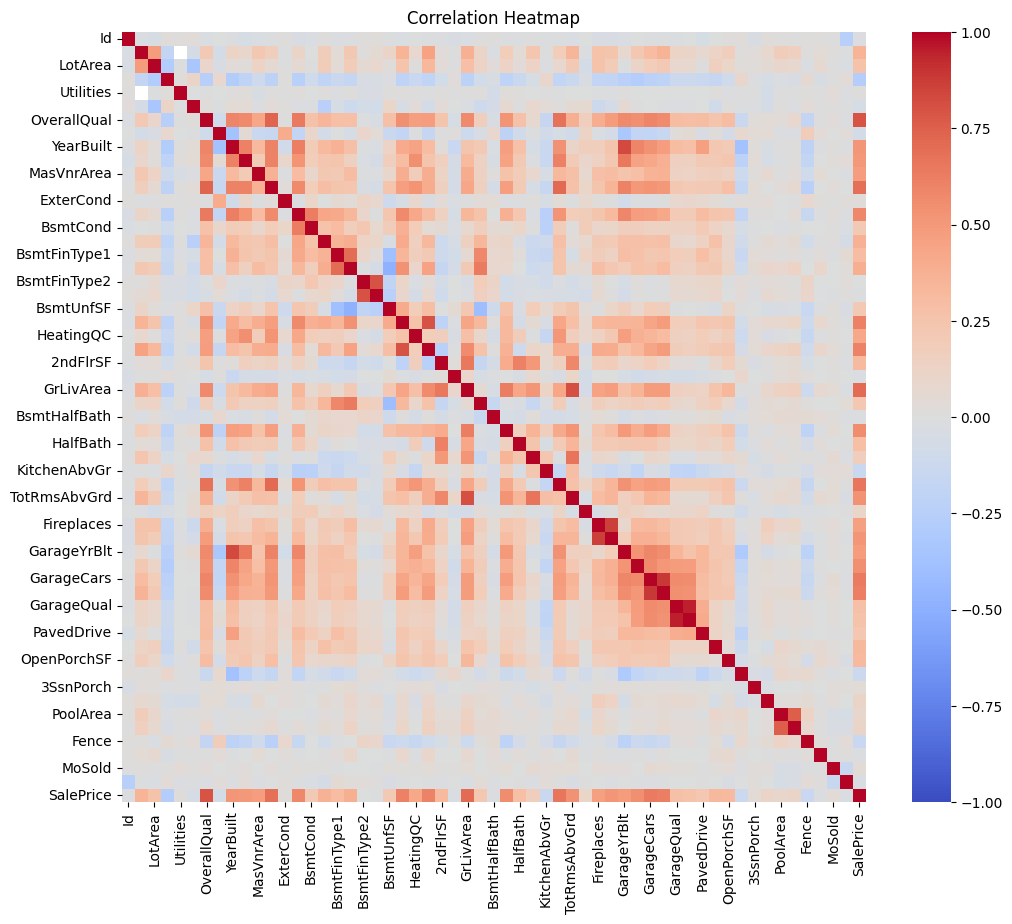

LotFrontage  Id            -0.027549
             LandSlope     -0.061969
             OverallCond   -0.075508
             LotShape      -0.172441
             Utilities           NaN
dtype: float64
WoodDeckSF          0
PavedDrive          0
GarageCond          0
MoSold              0
YrSold              0
SaleType            0
MiscVal             0
SaleCondition       0
BsmtFinSF1          1
BsmtFinSF2          1
GarageArea          1
TotalBsmtSF         1
BsmtUnfSF           1
GarageCars          1
BsmtFullBath        2
BsmtHalfBath        2
MasVnrArea         23
GarageYrBlt       159
LotFrontage       486
SalePrice        1459
dtype: int64


LotArea          0.489896
1stFlrSF         0.458247
GrLivArea        0.382462
GarageArea       0.359786
TotalBsmtSF      0.354822
SalePrice        0.351799
TotRmsAbvGrd     0.349513
GarageCars       0.310587
Fireplaces       0.261970
FireplaceQu      0.246242
BedroomAbvGr     0.234892
GarageFinish     0.226223
MasVnrArea       0.221079
BsmtFinSF1       0.219408
OverallQual      0.217645
KitchenQual      0.183317
FullBath         0.181668
BsmtExposure     0.177061
PoolArea         0.174119
LotShape         0.172441
OpenPorchSF      0.164896
ExterQual        0.164726
PoolQC           0.161825
YearBuilt        0.122811
WoodDeckSF       0.122070
GarageQual       0.121551
BsmtUnfSF        0.113714
BsmtQual         0.113472
BsmtFullBath     0.113245
GarageCond       0.111086
YearRemodAdd     0.091557
HeatingQC        0.084353
GarageYrBlt      0.076673
ScreenPorch      0.075858
OverallCond      0.075508
PavedDrive       0.064241
LandSlope        0.061969
BsmtFinSF2       0.047431
BsmtFinType1     0.046159
MiscVal          0.044272
HalfBath         0.039452
3SsnPorch        0.028289
Id               0.027549
2ndFlrSF         0.026545
BsmtHalfBath     0.025629
Functional       0.016389
ExterCond        0.012955
EnclosedPorch    0.011509
MoSold           0.011254
BsmtFinType2     0.011233
Fence            0.008154
YrSold           0.007917
BsmtCond         0.005806
LowQualFinSF     0.004894
KitchenAbvGr     0.004676
Utilities             NaN
dtype: float64

In [32]:
#while for categorical we use knn due to the relations between the features  so to do that first correlation btween the numerical values sould be done
#correlation with pearsons
corr_matrix = merged.corr(numeric_only=True)
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()
corr_series=corr_matrix.unstack()
corr_series=corr_series[corr_series != 1]
corr_series_abs= abs(corr_series)
sorted_corr=corr_series.sort_values(ascending=False)
sorted_corr_abs=corr_series_abs.sort_values(ascending=False)


f_corr=sorted_corr.loc[f]
f_corr_abs=sorted_corr_abs.loc[f]
print(f_corr.tail())
f_corr_abs
print(merged.isna().sum().sort_values().tail(20))
f_corr_abs.loc['LotFrontage']

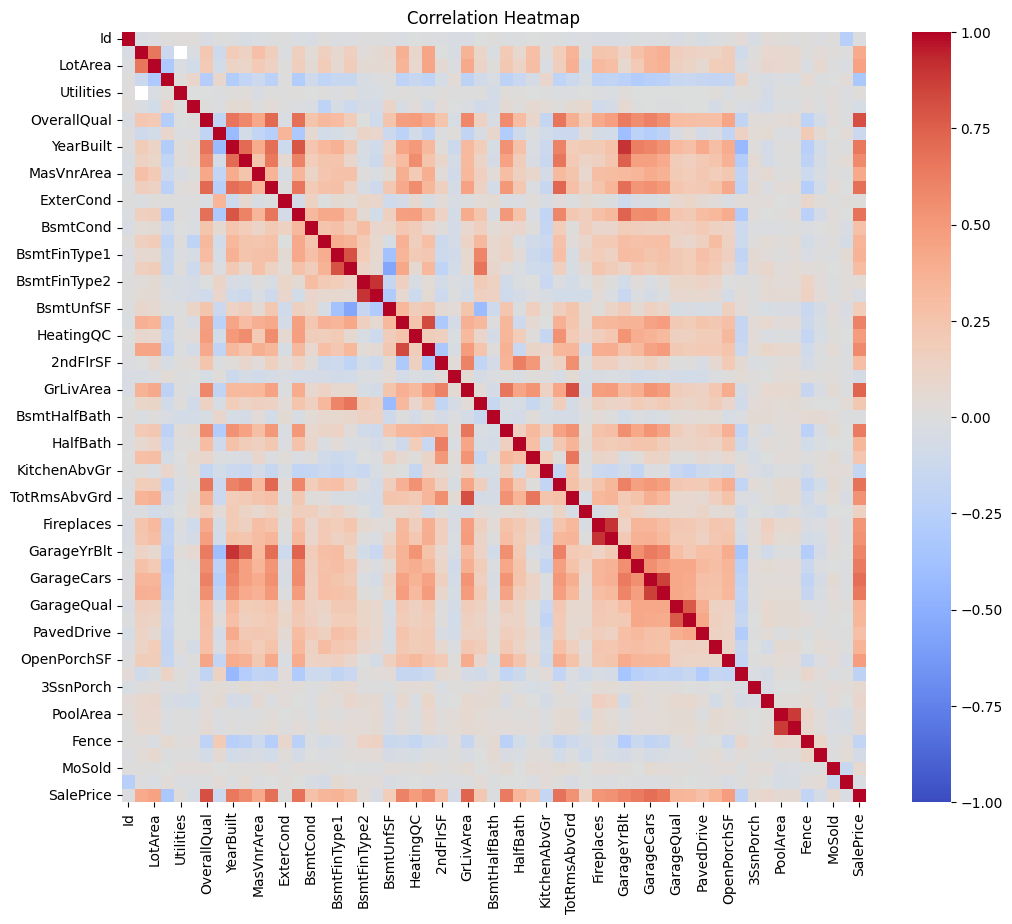

LotFrontage  LowQualFinSF    -0.043211
             EnclosedPorch   -0.094946
             OverallCond     -0.106011
             LotShape        -0.128579
             Utilities             NaN
dtype: float64
WoodDeckSF          0
PavedDrive          0
GarageCond          0
MoSold              0
YrSold              0
SaleType            0
MiscVal             0
SaleCondition       0
BsmtFinSF1          1
BsmtFinSF2          1
GarageArea          1
TotalBsmtSF         1
BsmtUnfSF           1
GarageCars          1
BsmtFullBath        2
BsmtHalfBath        2
MasVnrArea         23
GarageYrBlt       159
LotFrontage       486
SalePrice        1459
dtype: int64


LotArea          0.657113
1stFlrSF         0.444356
SalePrice        0.409076
GarageArea       0.378027
TotalBsmtSF      0.377806
GrLivArea        0.360486
TotRmsAbvGrd     0.358117
GarageCars       0.351241
BedroomAbvGr     0.283391
MasVnrArea       0.273822
GarageFinish     0.267851
Fireplaces       0.253977
FireplaceQu      0.240896
OverallQual      0.229579
FullBath         0.206882
YearBuilt        0.195007
KitchenQual      0.185605
OpenPorchSF      0.178252
GarageQual       0.170144
ExterQual        0.166856
BsmtQual         0.162507
BsmtFinSF1       0.161309
BsmtExposure     0.161020
GarageCond       0.145322
YearRemodAdd     0.134734
LotShape         0.128579
GarageYrBlt      0.127763
PavedDrive       0.125954
WoodDeckSF       0.121676
BsmtFullBath     0.108838
OverallCond      0.106011
EnclosedPorch    0.094946
HeatingQC        0.091218
BsmtUnfSF        0.088642
ScreenPorch      0.085234
PoolArea         0.083221
HalfBath         0.075075
BsmtFinType1     0.070860
PoolQC           0.070645
BsmtFinSF2       0.047170
LowQualFinSF     0.043211
BsmtCond         0.041913
MiscVal          0.037160
Id               0.034829
BsmtHalfBath     0.030946
BsmtFinType2     0.030449
LandSlope        0.025095
ExterCond        0.021023
MoSold           0.013844
Functional       0.013610
3SsnPorch        0.010037
KitchenAbvGr     0.009431
Fence            0.008500
YrSold           0.002838
2ndFlrSF         0.002042
Utilities             NaN
dtype: float64

In [33]:
#correlation with spearmans
corr_matrix = merged.corr(numeric_only=True,method='spearman')
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()
corr_series=corr_matrix.unstack()
corr_series=corr_series[corr_series != 1]
corr_series_abs= abs(corr_series)
sorted_corr=corr_series.sort_values(ascending=False)
sorted_corr_abs=corr_series_abs.sort_values(ascending=False)


f_corr=sorted_corr.loc[f]
f_corr_abs=sorted_corr_abs.loc[f]
print(f_corr.tail())
f_corr_abs
print(merged.isna().sum().sort_values().tail(20))
f_corr_abs.loc['LotFrontage']

In [34]:
#we are gonna go with spearmans as its the choosable since the data is not normally distributed
''' Identify features from the original list 'f' that did not have any
significant absolute correlation (above 0.2) with other features
and therefore were not included as the first level in the index
of f_corr_abs_top'''
f_corr_abs.head()
print(f)
f_corr_abs_top=f_corr_abs[f_corr_abs>0.2]
f_corr_abs_top.loc['LotFrontage']

['BsmtFinSF2', 'BsmtFinSF1', 'TotalBsmtSF', 'BsmtUnfSF', 'GarageArea', 'GarageCars', 'BsmtFullBath', 'BsmtHalfBath', 'MasVnrArea', 'LotFrontage']


LotArea         0.657113
1stFlrSF        0.444356
SalePrice       0.409076
GarageArea      0.378027
TotalBsmtSF     0.377806
GrLivArea       0.360486
TotRmsAbvGrd    0.358117
GarageCars      0.351241
BedroomAbvGr    0.283391
MasVnrArea      0.273822
GarageFinish    0.267851
Fireplaces      0.253977
FireplaceQu     0.240896
OverallQual     0.229579
FullBath        0.206882
dtype: float64

'''From the above code we can see that all feature except 'BsmtHalfBath' have at least one correlation with other feature
that is above 0.2, But even if its above 0.2  there is only one feature that is correlated with BsmtFinSF2 which is above the treshold and since the reason we chose kNN as imputation method is  to become more accurate than mean or median imputation,but if we are going to use only one feature that has a correlation of 0.23 it won't be relaiable so for this feature('BsmtFinSF2') and 'BsmtHalfBath' we will be doing  mean imputaion.
While for the others we will be using all the features above 0.2 for imputing

In [35]:
#droping 'BsmtHalfBath' from the list f
f.remove('BsmtHalfBath')
f.remove('BsmtFinSF2')

In [36]:
top_features= f_corr_abs_top.loc['MasVnrArea'].index.to_list()
top_features

['OverallQual',
 'SalePrice',
 'GarageCars',
 'YearBuilt',
 'TotalBsmtSF',
 '1stFlrSF',
 'GarageArea',
 'ExterQual',
 'GarageFinish',
 'BsmtQual',
 'GrLivArea',
 'GarageYrBlt',
 'KitchenQual',
 'FireplaceQu',
 'Fireplaces',
 'FullBath',
 'LotFrontage',
 'BsmtFinType1',
 'BsmtFinSF1',
 'YearRemodAdd',
 'TotRmsAbvGrd',
 'BsmtExposure',
 'PavedDrive',
 'OpenPorchSF',
 'HeatingQC',
 'LotArea',
 'GarageQual']

In [37]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
merged_imputed=merged.copy()
for col in f:
  top_features= f_corr_abs_top.loc[col].index.to_list()
  #creating a subset dataframe consisting of the specfic coloumn and its most correlated features
  sub_df=merged_imputed[[col]+top_features]
  # standardization since multiple of the features have different measurment
  scaler=StandardScaler()
  sub_scaled=scaler.fit_transform(sub_df)
  #impute
  imputer=KNNImputer(n_neighbors=5)
  sub_imputed=imputer.fit_transform(sub_scaled)
  #inverse scaling
  sub_imputed_unscaled = scaler.inverse_transform(sub_imputed)
  #Replace only the missing values in the original DataFrame
  merged_imputed.loc[merged[col].isnull(),col]=sub_imputed_unscaled[merged[col].isnull(),0]
print( merged_imputed.isna().sum().sort_values(ascending=False).head(20))

SalePrice       1459
GarageYrBlt      159
BsmtHalfBath       2
BsmtFinSF2         1
LotArea            0
MSSubClass         0
MSZoning           0
LotFrontage        0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Street             0
Alley              0
LotShape           0
Id                 0
HouseStyle         0
BldgType           0
Condition2         0
dtype: int64


In [38]:
merged['BsmtHalfBath'].dtype

dtype('float64')

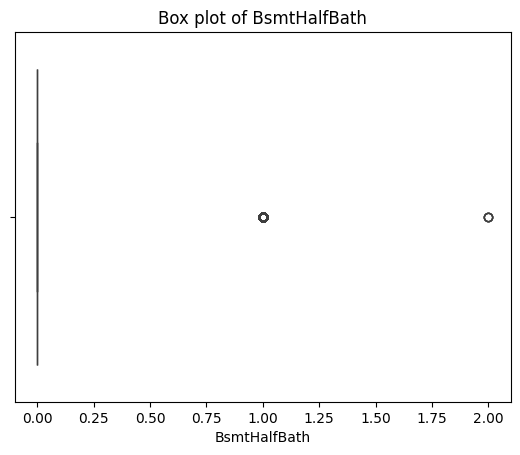

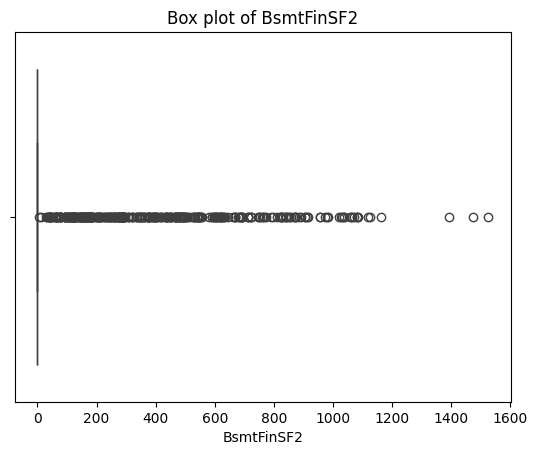

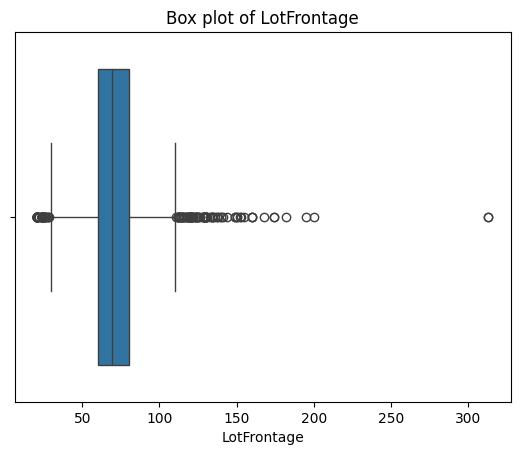

In [39]:
#imputing the rest of the features
rest = ['BsmtHalfBath', 'BsmtFinSF2','LotFrontage']
for col in rest:
    plt.figure() # Create a new figure for each box plot
    sns.boxplot(x=merged_imputed[col])
    plt.title(f'Box plot of {col}')
    plt.xlabel(col)
    plt.show()

In [40]:
#since the distribution of both features is skewwed the best way of imputing is median
rest=['BsmtHalfBath','BsmtFinSF2']
for col in rest:
  merged_imputed[col]=merged_imputed[col].fillna(merged_imputed[col].median())
print(merged_imputed.isna().sum().sort_values(ascending=False).head(10))

SalePrice      1459
GarageYrBlt     159
MSZoning          0
MSSubClass        0
LotArea           0
Street            0
Alley             0
LotFrontage       0
LandContour       0
Utilities         0
dtype: int64


In [41]:
#imputing the rest of the features like BsmtHalfBath BsmtFinSF2
merged_imputed.isna().sum().sort_values(ascending=False).head(10)

SalePrice      1459
GarageYrBlt     159
MSZoning          0
MSSubClass        0
LotArea           0
Street            0
Alley             0
LotFrontage       0
LandContour       0
Utilities         0
dtype: int64

In [42]:
#those with no garage cant have a value for GarageYrBlt so filling the na value by zero for those specfic rows
merged_imputed[['GarageYrBlt','GarageType']]
merged_imputed.loc[merged_imputed['GarageType']=='None_','GarageYrBlt']= merged_imputed.loc[merged_imputed['GarageType']=='None_','GarageYrBlt'].fillna(0)
merged_imputed.isna().sum().sort_values(ascending=False).head(10)

SalePrice      1459
GarageYrBlt       2
MSZoning          0
MSSubClass        0
LotArea           0
Street            0
Alley             0
LotFrontage       0
LandContour       0
Utilities         0
dtype: int64

In [43]:
#illogical YearRemodAdd after YearSold
merged_imputed[(merged_imputed['YearRemodAdd'])>(merged_imputed['YrSold'])][['YearRemodAdd','YrSold']]

YearRemodAdd  YrSold
train 523           2008    2007
test  835           2008    2007
      1089          2009    2007

In [44]:
#checking for any errors and inconsistencies
#illogical YearRemodAdd before YearBuilt
merged_imputed[(merged_imputed['GarageYrBlt'])>(merged_imputed['YrSold'])][['GarageYrBlt','YrSold']]

GarageYrBlt  YrSold
test 1089       2008.0    2007
     1132       2207.0    2007

In [45]:
#illogical GarageYrBlt before YearBuilt xpt those with zero values
merged_imputed[((merged_imputed['GarageYrBlt'])<(merged_imputed['YearBuilt']))&((merged_imputed['GarageYrBlt'])!=0)][['GarageYrBlt','YearBuilt']]


GarageYrBlt  YearBuilt
train 29         1920.0       1927
      93         1900.0       1910
      324        1961.0       1967
      600        2003.0       2005
      736        1949.0       1950
      1103       1954.0       1959
      1376       1925.0       1930
      1414       1922.0       1923
      1418       1962.0       1963
test  61         1956.0       1959
      116        2009.0       2010
      345        1920.0       1935
      380        1960.0       1978
      435        1940.0       1941
      437        1926.0       1935
      662        1925.0       1945
      803        2005.0       2006
      1049       2005.0       2006

In [46]:
#critical error of YrSold before YearBuilt
merged_imputed[((merged_imputed['YrSold'])<(merged_imputed['YearBuilt']))][['YearBuilt','YrSold']]

YearBuilt  YrSold
test 1089       2008    2007

In [47]:
#illogical GarageYrBlt after YrSold
merged_imputed[((merged_imputed['YearRemodAdd'])<(merged_imputed['YearBuilt']))][['YearBuilt','YearRemodAdd']]

YearBuilt  YearRemodAdd
test 416       2002          2001

In [48]:
# manging the errors
condition1= merged_imputed['YearRemodAdd']<merged_imputed['YearBuilt']
condition2= merged_imputed['YrSold']<merged_imputed['YearBuilt']
condition3= ((merged_imputed['GarageYrBlt'])<(merged_imputed['YearBuilt']))&((merged_imputed['GarageYrBlt'])!=0)
condition4= merged_imputed['GarageYrBlt']>merged_imputed['YrSold']
condition5= merged_imputed['YearRemodAdd']>merged_imputed['YrSold']
#since droping is not an option we will be setting YearRemodAdd equal to YearBuilt
merged_imputed.loc[condition1,'YearRemodAdd']=merged_imputed.loc[condition1,'YearBuilt']
merged_imputed[condition1][['YearRemodAdd','YearBuilt']]
#set Yrsold to yearBuilt
merged_imputed.loc[condition2,'YrSold']=merged_imputed.loc[condition2,'YearBuilt']
#set GarageYrBlt to YearBuilt
merged_imputed.loc[condition3,'GarageYrBlt']=merged_imputed.loc[condition3,'YearBuilt']
#set GarageYrBlt to YrSold
merged_imputed.loc[condition4,'GarageYrBlt']=merged_imputed.loc[condition4,'YrSold']
#set YrRemod add to Yrsold
merged_imputed.loc[condition5,'YearRemodAdd']=merged_imputed.loc[condition5,'YrSold']
l=[condition1,condition2,condition3,condition4,condition5]
for condition in l:
  print(merged_imputed[condition][['YearRemodAdd','YrSold','GarageYrBlt','YearBuilt']])



          YearRemodAdd  YrSold  GarageYrBlt  YearBuilt
test 416          2002    2009       2002.0       2002
           YearRemodAdd  YrSold  GarageYrBlt  YearBuilt
test 1089          2008    2008       2008.0       2008
            YearRemodAdd  YrSold  GarageYrBlt  YearBuilt
train 29            1950    2008       1927.0       1927
      93            1998    2007       1910.0       1910
      324           2007    2010       1967.0       1967
      600           2005    2006       2005.0       2005
      736           1950    2006       1950.0       1950
      1103          1959    2006       1959.0       1959
      1376          1950    2008       1930.0       1930
      1414          2000    2008       1923.0       1923
      1418          1963    2008       1963.0       1963
test  61            1959    2010       1959.0       1959
      116           2010    2010       2010.0       2010
      345           1998    2009       1935.0       1935
      380           1978    2009     

In [49]:
#trying to see what kind of gargetype has a missing year of garage construction date
print(merged_imputed.loc[merged_imputed['GarageYrBlt'].isna(),'GarageType'].unique())
merged_imputed.loc[merged_imputed['GarageType']=='Detchd','GarageYrBlt'].mean()

['Detchd']


np.float64(1961.3011583011582)

In [50]:
#trying to see the relationship between the year the home was built and the garage was built
#comparing which one is greater in number those with same number of yearbuilt and grage built or those with differnt values
print(merged_imputed[merged_imputed['YearBuilt']!=merged_imputed['GarageYrBlt']][['YearBuilt','GarageYrBlt']].value_counts().sum())
print(merged_imputed[merged_imputed['YearBuilt']==merged_imputed['GarageYrBlt']][['YearBuilt','GarageYrBlt']].value_counts().sum())
#trying to see the relationship between the year the home was remodeled and the garage was built
#comparing which on is greater in number those with same number of yearRemodAdd and garage built or those with differnt values
print(merged_imputed[merged_imputed['YearRemodAdd']!=merged_imputed['GarageYrBlt']][['YearRemodAdd','GarageYrBlt']].value_counts().sum())
print(merged_imputed[merged_imputed['YearRemodAdd']==merged_imputed['GarageYrBlt']][['YearRemodAdd','GarageYrBlt']].value_counts().sum())

683
2234
1434
1483


In [51]:
#trying to see what type of garage we are dealing with
merged_imputed.loc[merged_imputed['GarageYrBlt'].isna(),['GarageType','YearBuilt','YearRemodAdd']]

GarageType  YearBuilt  YearRemodAdd
test 666      Detchd       1910          1983
     1116     Detchd       1923          1999

In [52]:
merged_imputed.loc[merged_imputed['GarageType']=='Detchd',['GarageYrBlt','YearBuilt','YearRemodAdd']]

GarageYrBlt  YearBuilt  YearRemodAdd
train 3          1998.0       1915          1970
      8          1931.0       1931          1950
      10         1965.0       1965          1965
      12         1962.0       1962          1962
      15         1991.0       1929          2001
...                 ...        ...           ...
test  1426       1942.0       1942          1950
      1427       1950.0       1926          1950
      1429       1925.0       1925          1950
      1430       1957.0       1957          1957
      1456       1960.0       1960          1996

[779 rows x 3 columns]

In [53]:
merged_imputed['YearRemodAdd'].dtype

dtype('int32')

In [54]:
#going specfic  as we are trying to number of houses with detached garages
print(merged_imputed[merged_imputed['GarageType'] == 'Detchd'].value_counts().sum())


387


In [55]:
#trying to find out how many of these detached garages were built in the same year as the house was built
filtered_df = merged_imputed[(merged_imputed['GarageType'] == 'Detchd') & (merged_imputed['YearBuilt']== merged_imputed['GarageYrBlt'])]

# Select the desired columns from the filtered DataFrame and calculate the sum of value counts
sum_of_counts = filtered_df[['YearBuilt', 'GarageYrBlt']].value_counts().sum()

# Print the result if needed
print(sum_of_counts)
#trying to find out how many of these detached garages were built in the same year as the house was remodeled
fill_df=merged_imputed[(merged_imputed['GarageType']=='Detchd')&(merged_imputed['YearRemodAdd']==merged_imputed['GarageYrBlt'])]
print(fill_df[['YearRemodAdd','GarageYrBlt']].value_counts().sum())

392
179


In [56]:
merged_imputed[['GarageYrBlt','MoSold','YrSold','YearBuilt','YearRemodAdd']]

GarageYrBlt  MoSold  YrSold  YearBuilt  YearRemodAdd
train 0          2003.0       2    2008       2003          2003
      1          1976.0       5    2007       1976          1976
      2          2001.0       9    2008       2001          2002
      3          1998.0       2    2006       1915          1970
      4          2000.0      12    2008       2000          2000
...                 ...     ...     ...        ...           ...
test  1454          0.0       6    2006       1970          1970
      1455       1970.0       4    2006       1970          1970
      1456       1960.0       9    2006       1960          1996
      1457          0.0       7    2006       1992          1992
      1458       1993.0      11    2006       1993          1994

[2919 rows x 5 columns]

In [57]:
#the number shows that among 387 observations of houses with detached garage 382 of these gragaes were built in the same year the houses were built.
#this is greater than the year remodeling year similarity which is only 175(that has the same year of remodeling and garage building)
#so we will go with yearbuilt for imputing
merged_imputed['GarageYrBlt'].fillna(merged_imputed['YearBuilt'],inplace=True)
merged_imputed.isna().sum().sort_values(ascending=False).head(10)



/tmp/ipython-input-57-3816086110.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_imputed['GarageYrBlt'].fillna(merged_imputed['YearBuilt'],inplace=True)


SalePrice      1459
MSSubClass        0
MSZoning          0
LotFrontage       0
LotArea           0
Street            0
Alley             0
LotShape          0
LandContour       0
Utilities         0
dtype: int64

In [58]:
merged_imputed['GarageYrBlt']=merged_imputed['GarageYrBlt'].astype('int')
merged_imputed['GarageYrBlt']

train  0       2003
       1       1976
       2       2001
       3       1998
       4       2000
               ... 
test   1454       0
       1455    1970
       1456    1960
       1457       0
       1458    1993
Name: GarageYrBlt, Length: 2919, dtype: int64

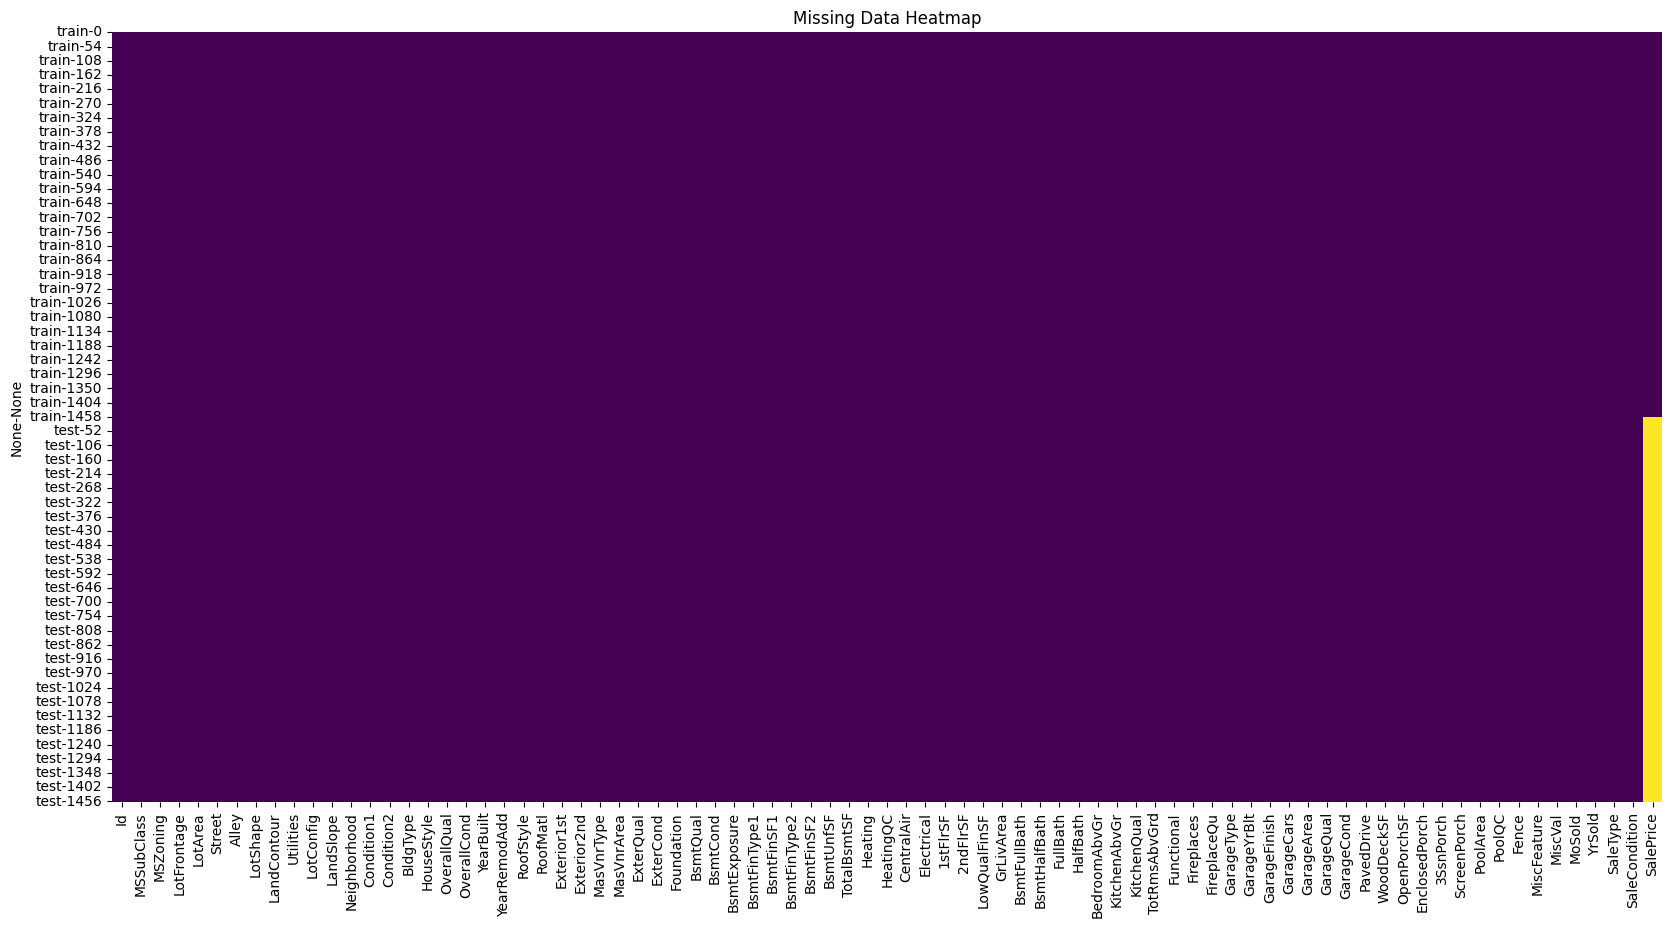

In [59]:
plt.figure(figsize=(20,10))
sns.heatmap(merged_imputed.isna(), cbar=False, cmap="viridis")
plt.title("Missing Data Heatmap")
plt.show()

In [60]:
#identifying the date columns for feature transformation and preprocessing for machine learning
datetime_cols = merged_imputed.select_dtypes(include=['datetime64[ns]']).columns.tolist()
datetime_cols=['YearBuilt', 'YearRemodAdd', 'MoSold', 'YrSold','GarageYrBlt']
merged_imputed[datetime_cols]

YearBuilt  YearRemodAdd  MoSold  YrSold  GarageYrBlt
train 0          2003          2003       2    2008         2003
      1          1976          1976       5    2007         1976
      2          2001          2002       9    2008         2001
      3          1915          1970       2    2006         1998
      4          2000          2000      12    2008         2000
...               ...           ...     ...     ...          ...
test  1454       1970          1970       6    2006            0
      1455       1970          1970       4    2006         1970
      1456       1960          1996       9    2006         1960
      1457       1992          1992       7    2006            0
      1458       1993          1994      11    2006         1993

[2919 rows x 5 columns]

since  the date columns specfify only the time the incident happend and cannot be used for linear regresson we wil be transforming them in to a new column that quantify and specfiy the sattus of the house in relation to this columns. the new columns are numerical like
HouseAge = YrSold - YearBuilt: Age of the house at the time of sale.
RemodAge = YrSold - YearRemodAdd: Time since the last remodel.
GarageAge = YrSold - GarageYrBlt: Age of the garage at the time of sale.
RemodDelay= YearRemodAdd-YearBuilt: time elapsed betwen the house's construction and its latest remodel or addition

In [61]:
merged_imputed_pro=merged_imputed.copy()

In [62]:
merged_imputed['GarageYrBlt'].unique()

array([2003, 1976, 2001, 1998, 2000, 1993, 2004, 1973, 1931, 1939, 1965,
       2005, 1962, 2006, 1960, 1991, 1970, 1967, 1958, 1930, 2002, 1968,
       2007, 2008, 1957, 1927, 1920, 1966, 1959, 1995, 1954, 1953,    0,
       1983, 1977, 1997, 1985, 1963, 1981, 1964, 1999, 1935, 1990, 1945,
       1987, 1989, 1915, 1956, 1948, 1974, 2009, 1950, 1961, 1921, 1910,
       1979, 1951, 1969, 1936, 1975, 1971, 1923, 1984, 1926, 1955, 1986,
       1988, 1916, 1932, 1972, 1918, 1980, 1924, 1996, 1940, 1949, 1994,
       1978, 1982, 1992, 1925, 1941, 2010, 1947, 1937, 1942, 1938, 1952,
       1928, 1922, 1934, 1906, 1914, 1946, 1908, 1929, 1933, 1900, 1917,
       1896, 1895, 1943, 1919])

In [63]:
#Feature Engineering
merged_imputed_pro['GarageAge']=merged_imputed['YrSold']-merged_imputed['GarageYrBlt']
merged_imputed_pro['RemodAge']=merged_imputed['YrSold']-merged_imputed['YearRemodAdd']
merged_imputed_pro['HouseAge']=merged_imputed['YrSold']-merged_imputed['YearBuilt']
merged_imputed_pro['RemodDelay']=merged_imputed['YearRemodAdd']-merged_imputed['YearBuilt']
merged_imputed_pro.drop(columns=['GarageYrBlt','YearRemodAdd','YearBuilt','YrSold'],inplace=True)
merged_imputed_pro.head()

Id MSSubClass MSZoning  LotFrontage  LotArea Street  Alley  LotShape  \
train 0   1         60       RL         65.0     8450   Pave  None_         4   
      1   2         20       RL         80.0     9600   Pave  None_         4   
      2   3         60       RL         68.0    11250   Pave  None_         3   
      3   4         70       RL         60.0     9550   Pave  None_         3   
      4   5         60       RL         84.0    14260   Pave  None_         3   

        LandContour  Utilities  ... MiscFeature  MiscVal MoSold SaleType  \
train 0         Lvl          4  ...       None_        0      2       WD   
      1         Lvl          4  ...       None_        0      5       WD   
      2         Lvl          4  ...       None_        0      9       WD   
      3         Lvl          4  ...       None_        0      2       WD   
      4         Lvl          4  ...       None_        0     12       WD   

        SaleCondition SalePrice GarageAge  RemodAge  HouseAge RemodDelay  
train 0        Normal  208500.0         5         5         5          0  
      1        Normal  181500.0        31        31        31          0  
      2        Normal  223500.0         7         6         7          1  
      3       Abnorml  140000.0         8        36        91         55  
      4        Normal  250000.0         8         8         8          0  

[5 rows x 81 columns]

In [64]:
merged_imputed_pro['GarageAge'].unique()

array([   5,   31,    7,    8,   16,    3,   36,   77,   69,   43,    1,
         46,   48,   40,   39,    4,   51,    6,   42,    2,   49,   81,
         88,   14,   55,   57, 2008,   41,   24,   47, 2009,   10,   21,
         25,   45,   44,    0,   35,   72,   20,   11,   65,   53,   34,
         95,   52,   60, 2010,   33,   15, 2007,   56,   97,   90,   30,
         54,   62,   37,   28,   50, 2006,    9,   38,   17,   12,   78,
         70,   32,   83,   19,   22,   86,   13,   93,   75,   82,   61,
         66,   18,   29,   96,   27,   59,   67,   26,   79,   89,   68,
         87,   74,   92,   94,   71,   80,   58,   84,   23,   76,   73,
        102,   85,   64,   99,  100,   91,  110,   63,  114,  109,   98,
        113,  108,  106])

In [65]:
#since the 2010,2008,2006,2007 and 2009 are obtained by subustracting the yr sold from the gargeyr built which was zero in thefirst place
# this shows they are values of those that dont posess garages so we will making the value of garageage 0
merged_imputed_pro.loc[merged_imputed_pro['GarageType']=='None_','GarageAge']=0
merged_imputed_pro['GarageAge'].unique()

array([  5,  31,   7,   8,  16,   3,  36,  77,  69,  43,   1,  46,  48,
        40,  39,   4,  51,   6,  42,   2,  49,  81,  88,  14,  55,  57,
         0,  41,  24,  47,  10,  21,  25,  45,  44,  35,  72,  20,  11,
        65,  53,  34,  95,  52,  60,  33,  15,  56,  97,  90,  30,  54,
        62,  37,  28,  50,   9,  38,  17,  12,  78,  70,  32,  83,  19,
        22,  86,  13,  93,  75,  82,  61,  66,  18,  29,  96,  27,  59,
        67,  26,  79,  89,  68,  87,  74,  92,  94,  71,  80,  58,  84,
        23,  76,  73, 102,  85,  64,  99, 100,  91, 110,  63, 114, 109,
        98, 113, 108, 106])

In [66]:
merged_imputed_pro['RemodDelay'].unique()

array([  0,   1,  55,   2,  19,  11,  72,   7,  20,  33,  49,  40,  23,
        30,  36,  54,   5,  88,  16,   6,  76,  29,  24,  35,  53,  71,
        67,  85, 110,  86,  18,  57,  47,  43,  25,  62,  14,  15,  27,
        26,  78,  59,  38,   9,  51,  83, 101,  32,   3,  39,  10,  52,
        50,   8,  48,  79,  58,  82,  17, 122,  65,  34,  75,  60,  42,
        77,  28,  22,  61,  46,  89,  80,  13,  63,  90,  70,  37, 100,
        44,   4,  81, 107,  21,  64, 111,  69,  31,  68,  96, 108,  56,
        92, 123,  94,  45,  87,  41,  74,  98,  12, 103, 106,  93, 104,
        73, 121, 115,  95,  84, 112,  97, 127, 109,  66, 116, 105],
      dtype=int32)

In [67]:
merged_imputed_pro['HouseAge'].unique()

array([  5,  31,   7,  91,   8,  16,   3,  36,  77,  69,  43,   1,  46,
        48,  78,  40,  39,   4,  51,   6,  42,   2,  59,  49,  81,  88,
        15,  55,  57,  53,  41,  24,  33,  47,  89,  10,  72,  25,  52,
        44,   0,  87,  12,  65,  34,  11,  56,  95,  60,  99,  14,  94,
        13,  45,  97,  90,  30,  76, 122,  54,  62,  20,  37,  68,  50,
        71,   9,  38,  18,  58,  70,  32,  35,  83,  84,  66,  19,  22,
        86,  98, 114,  93,  75,  82,  17, 106,  29,  96,  27,  92, 128,
        61,  67,  21,  26, 108,  28,  63,  73,  74,  80, 115, 126, 102,
        85,  23, 110, 117, 129,  64, 100, 111, 104, 119, 127, 107, 135,
       109, 136, 103,  79, 125, 120, 118, 113, 112, 101], dtype=int32)

In [68]:
merged_imputed_pro['RemodAge'].unique()

array([ 5, 31,  6, 36,  8, 14,  2, 58, 43,  0, 46, 48, 40, 39,  4, 44, 57,
        9, 10,  1, 51, 19,  3, 53, 41, 24, 28, 47, 56, 52, 11, 60, 21, 34,
        7, 42, 13, 27, 12, 45, 16, 25, 30, 33, 54, 20, 37, 50, 15, 38, 17,
       32, 35, 22, 18, 59, 29, 49, 26, 55, 23], dtype=int32)

In [69]:
#performing cyclical encoding for month sold feature to preserve the periodic nature
merged_imputed_pro['MoSold_sin'] = np.sin(2 * np.pi * merged_imputed_pro['MoSold'] / 12)
merged_imputed_pro['MoSold_cos'] = np.cos(2 * np.pi * merged_imputed_pro['MoSold'] / 12)
merged_imputed_pro.drop(columns=['MoSold'],inplace=True)
merged_imputed_pro.head()

Id MSSubClass MSZoning  LotFrontage  LotArea Street  Alley  LotShape  \
train 0   1         60       RL         65.0     8450   Pave  None_         4   
      1   2         20       RL         80.0     9600   Pave  None_         4   
      2   3         60       RL         68.0    11250   Pave  None_         3   
      3   4         70       RL         60.0     9550   Pave  None_         3   
      4   5         60       RL         84.0    14260   Pave  None_         3   

        LandContour  Utilities  ... MiscVal  SaleType SaleCondition SalePrice  \
train 0         Lvl          4  ...       0        WD        Normal  208500.0   
      1         Lvl          4  ...       0        WD        Normal  181500.0   
      2         Lvl          4  ...       0        WD        Normal  223500.0   
      3         Lvl          4  ...       0        WD       Abnorml  140000.0   
      4         Lvl          4  ...       0        WD        Normal  250000.0   

        GarageAge RemodAge HouseAge  RemodDelay    MoSold_sin    MoSold_cos  
train 0         5        5        5           0  8.660254e-01  5.000000e-01  
      1        31       31       31           0  5.000000e-01 -8.660254e-01  
      2         7        6        7           1 -1.000000e+00 -1.836970e-16  
      3         8       36       91          55  8.660254e-01  5.000000e-01  
      4         8        8        8           0 -2.449294e-16  1.000000e+00  

[5 rows x 82 columns]

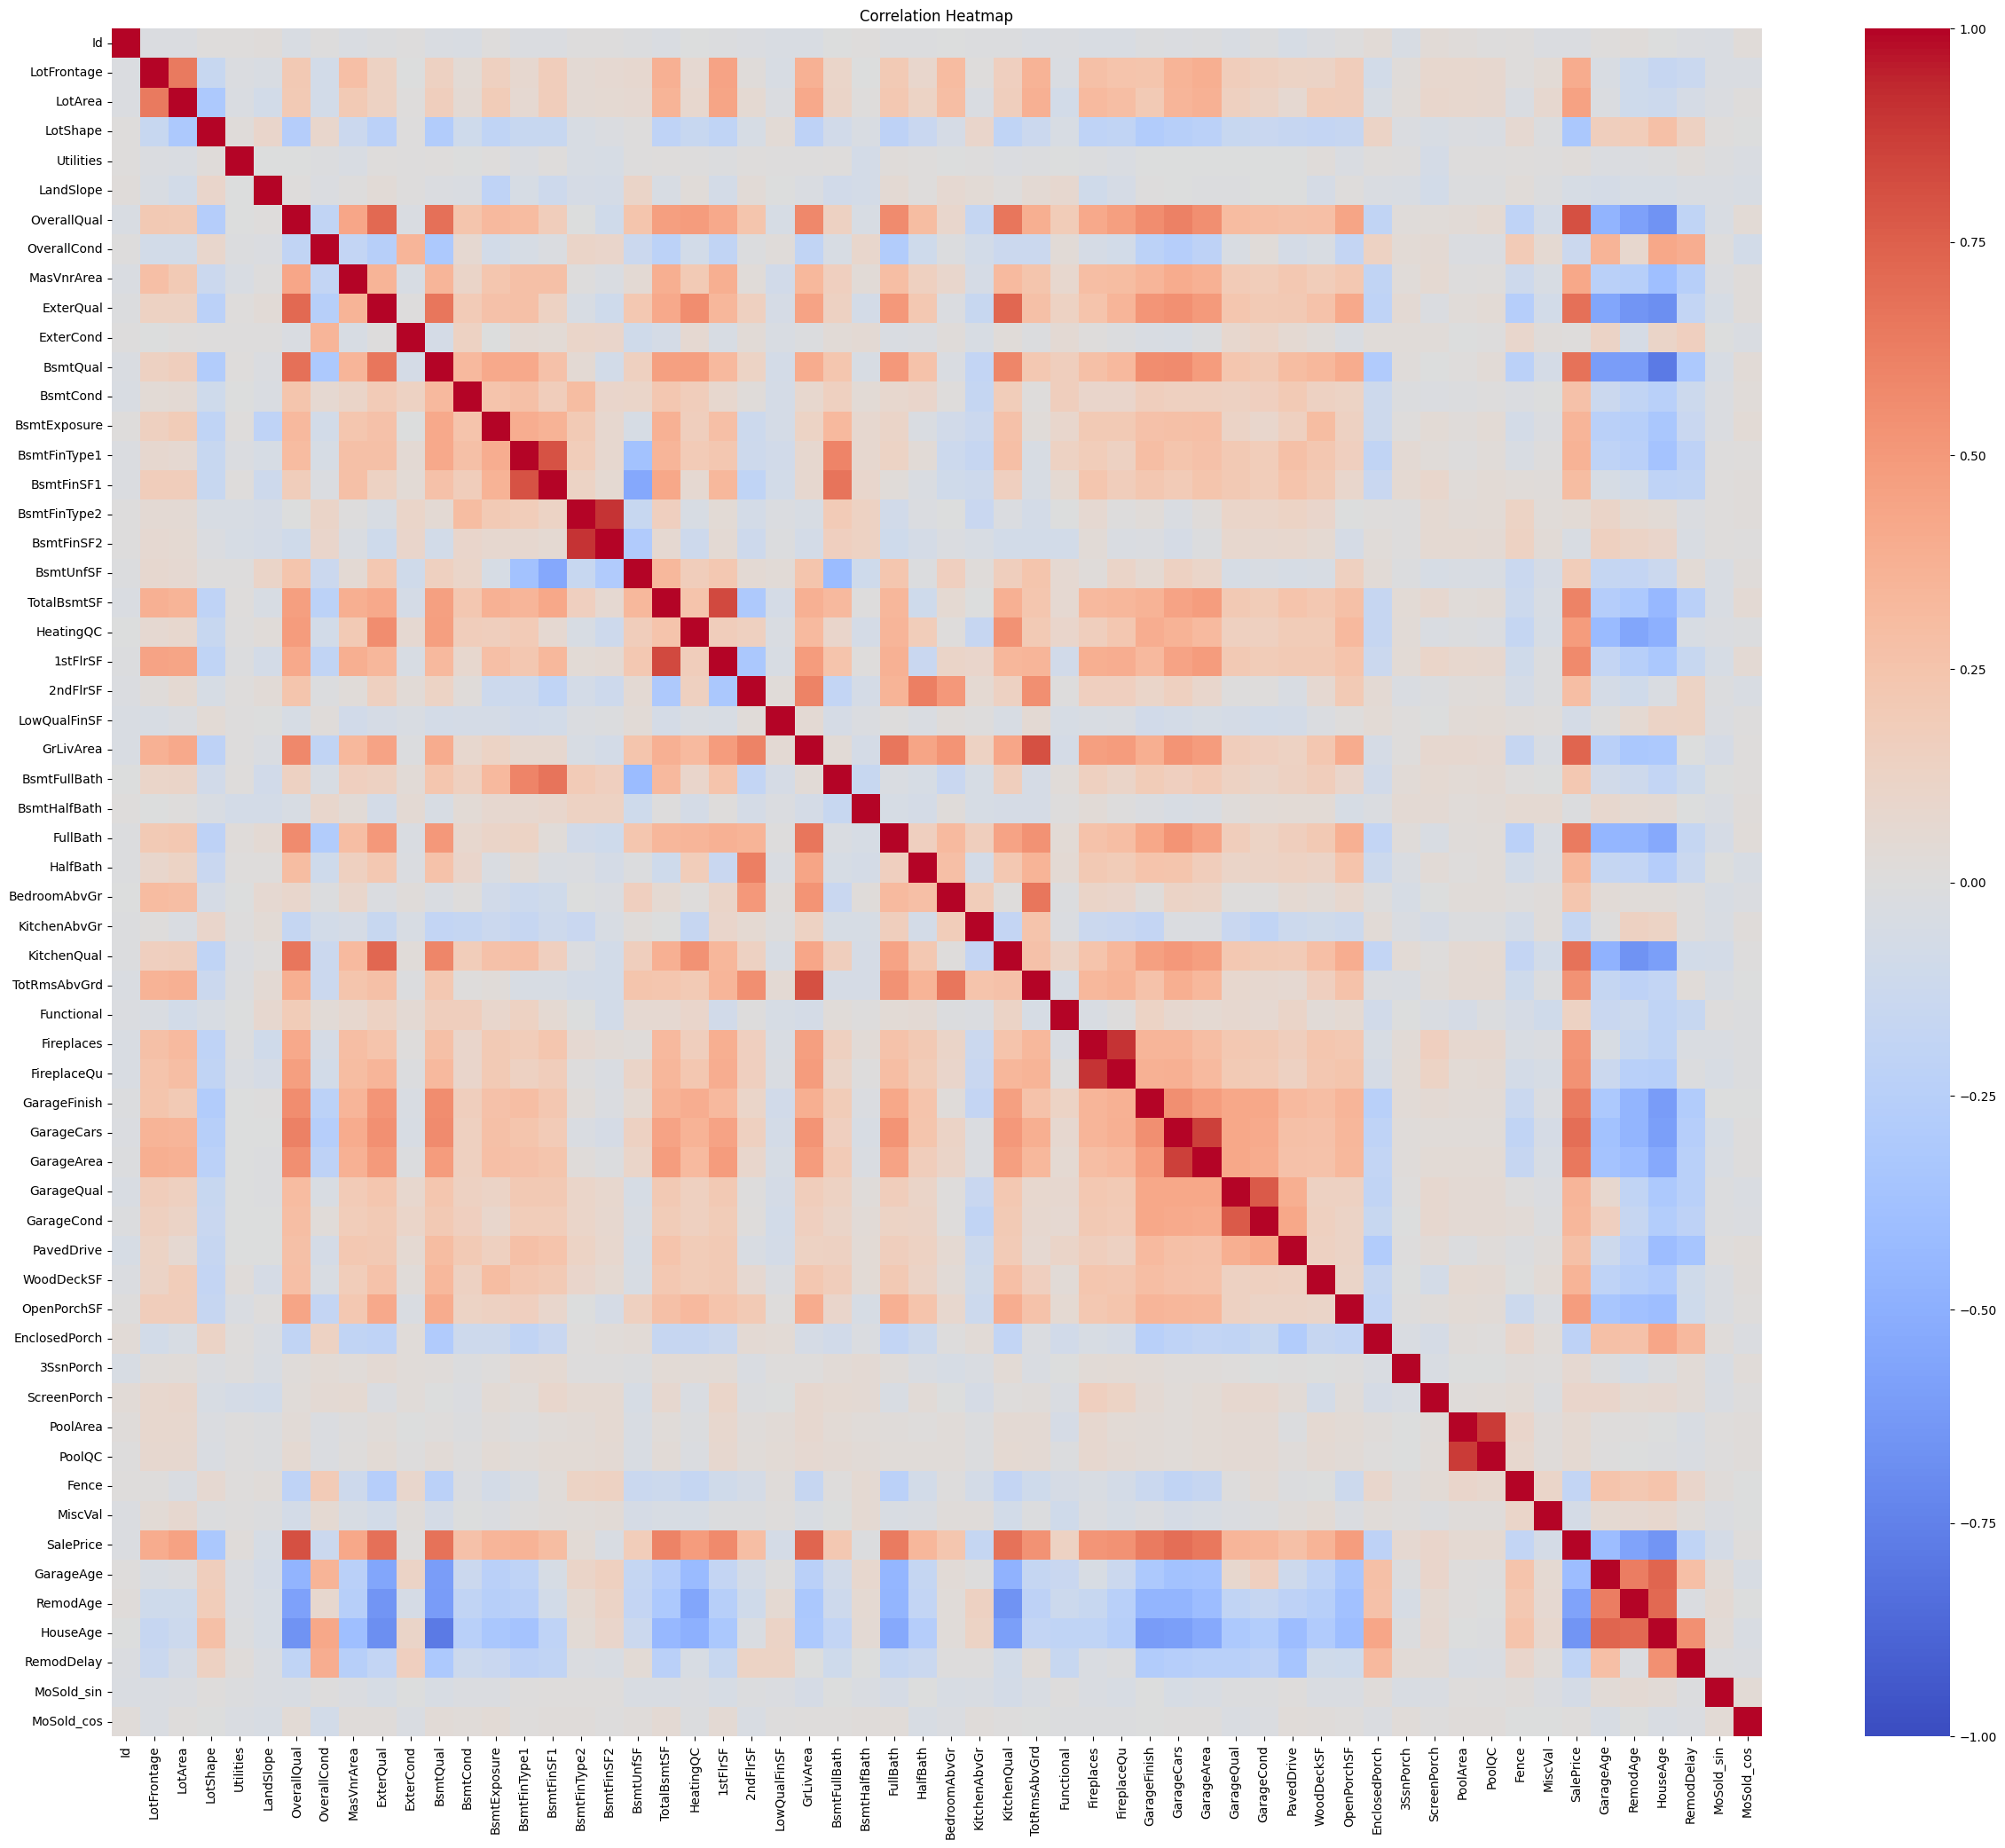

Feature1      Feature2      corr
0     BsmtFinType2    BsmtFinSF2  0.904212
1      FireplaceQu    Fireplaces  0.903822
2           PoolQC      PoolArea  0.876900
3       GarageCars    GarageArea  0.864929
4         1stFlrSF   TotalBsmtSF  0.828737
...            ...           ...       ...
1648      PoolArea     ExterCond  0.000350
1649    MoSold_sin  BsmtFullBath  0.000342
1650   OverallQual     Utilities  0.000315
1651      HalfBath    MoSold_sin  0.000058
1652     3SsnPorch    GarageCond  0.000003

[1653 rows x 3 columns]

In [70]:
corr_matrix2 = merged_imputed_pro.corr(numeric_only=True,method='spearman')
plt.figure(figsize=(30, 25))
sns.heatmap(corr_matrix2, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()
corr_series2=corr_matrix2.unstack()
corr_series2=corr_series2[corr_series2 != 1]
corr_series_abs2= abs(corr_series2)
sorted_corr2=corr_series2.sort_values(ascending=False)
sorted_corr_abs2=corr_series_abs2.sort_values(ascending=False)
sorted_corr_abs2.drop_duplicates(inplace=True)
sorted_corr_abs2=sorted_corr_abs2.reset_index()
sorted_corr_abs2.columns=['Feature1','Feature2','corr']
sorted_corr_abs2





In [71]:
high_corr=sorted_corr_abs2[sorted_corr_abs2['corr']>0.75]
high_corr

Feature1      Feature2      corr
0  BsmtFinType2    BsmtFinSF2  0.904212
1   FireplaceQu    Fireplaces  0.903822
2        PoolQC      PoolArea  0.876900
3    GarageCars    GarageArea  0.864929
4      1stFlrSF   TotalBsmtSF  0.828737
5     SalePrice   OverallQual  0.809829
6  TotRmsAbvGrd     GrLivArea  0.808775
7    BsmtFinSF1  BsmtFinType1  0.800615
8      HouseAge      BsmtQual  0.785176
9    GarageCond    GarageQual  0.771897

In [72]:
sale_corr=merged_imputed_pro.corr(numeric_only=True,method='spearman')['SalePrice'].abs().sort_values(ascending=False)
sale_corr


SalePrice        1.000000
OverallQual      0.809829
GrLivArea        0.731310
GarageCars       0.690711
ExterQual        0.684014
BsmtQual         0.678026
KitchenQual      0.672849
HouseAge         0.650120
GarageArea       0.649379
FullBath         0.635957
GarageFinish     0.633974
TotalBsmtSF      0.602725
RemodAge         0.576582
1stFlrSF         0.575408
FireplaceQu      0.537602
TotRmsAbvGrd     0.532586
Fireplaces       0.519247
HeatingQC        0.491392
OpenPorchSF      0.477561
LotArea          0.456461
MasVnrArea       0.422809
GarageAge        0.407591
LotFrontage      0.405518
BsmtFinType1     0.361625
WoodDeckSF       0.353802
GarageQual       0.351082
BsmtExposure     0.344207
HalfBath         0.343008
GarageCond       0.339015
LotShape         0.321055
BsmtFinSF1       0.301871
2ndFlrSF         0.293598
PavedDrive       0.280602
BsmtCond         0.269373
BedroomAbvGr     0.234907
BsmtFullBath     0.225125
EnclosedPorch    0.218394
RemodDelay       0.200179
Fence            0.186185
BsmtUnfSF        0.185197
KitchenAbvGr     0.164826
Functional       0.135489
OverallCond      0.129325
ScreenPorch      0.100070
LowQualFinSF     0.067719
3SsnPorch        0.065440
MoSold_sin       0.065366
MiscVal          0.062727
PoolQC           0.058469
PoolArea         0.058453
LandSlope        0.050310
BsmtFinType2     0.039813
BsmtFinSF2       0.038806
Id               0.018546
Utilities        0.016710
BsmtHalfBath     0.012189
ExterCond        0.011682
MoSold_cos       0.009468
Name: SalePrice, dtype: float64

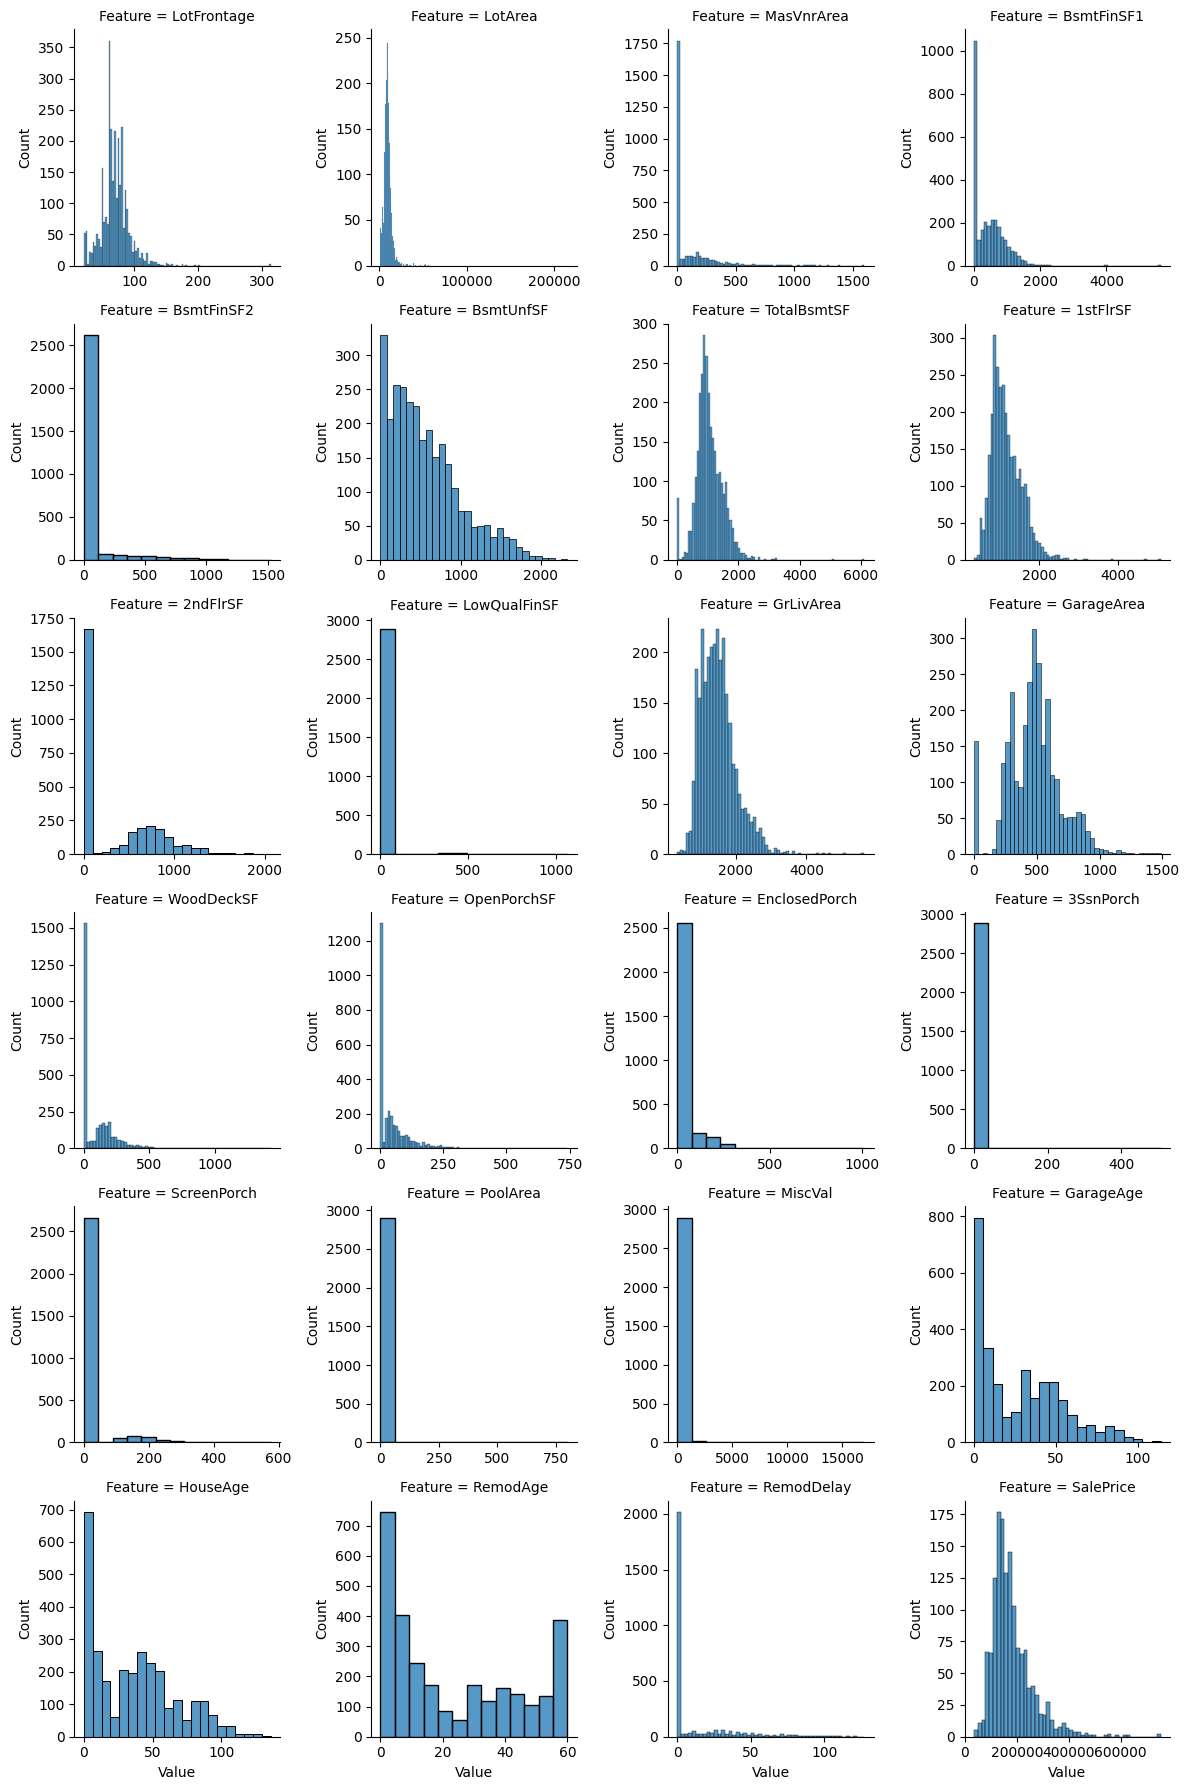

In [73]:
#but since we are planing to do  linear regression we need pearson correlation and to do that we need to see the distribution numerical data types excluding the count types
#as we plan to log transform those those with right skewness so that persons could be applied as it requires normal distribution
# so we satrt by visualization
numeric=['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','GarageAge','HouseAge','RemodAge','RemodDelay','SalePrice']
df_melted = merged_imputed_pro[numeric].melt(var_name='Feature', value_name='Value')
g = sns.FacetGrid(df_melted, col='Feature', col_wrap=4, height=3, sharex=False, sharey=False)
g.map(sns.histplot, 'Value')
plt.tight_layout()
plt.show()

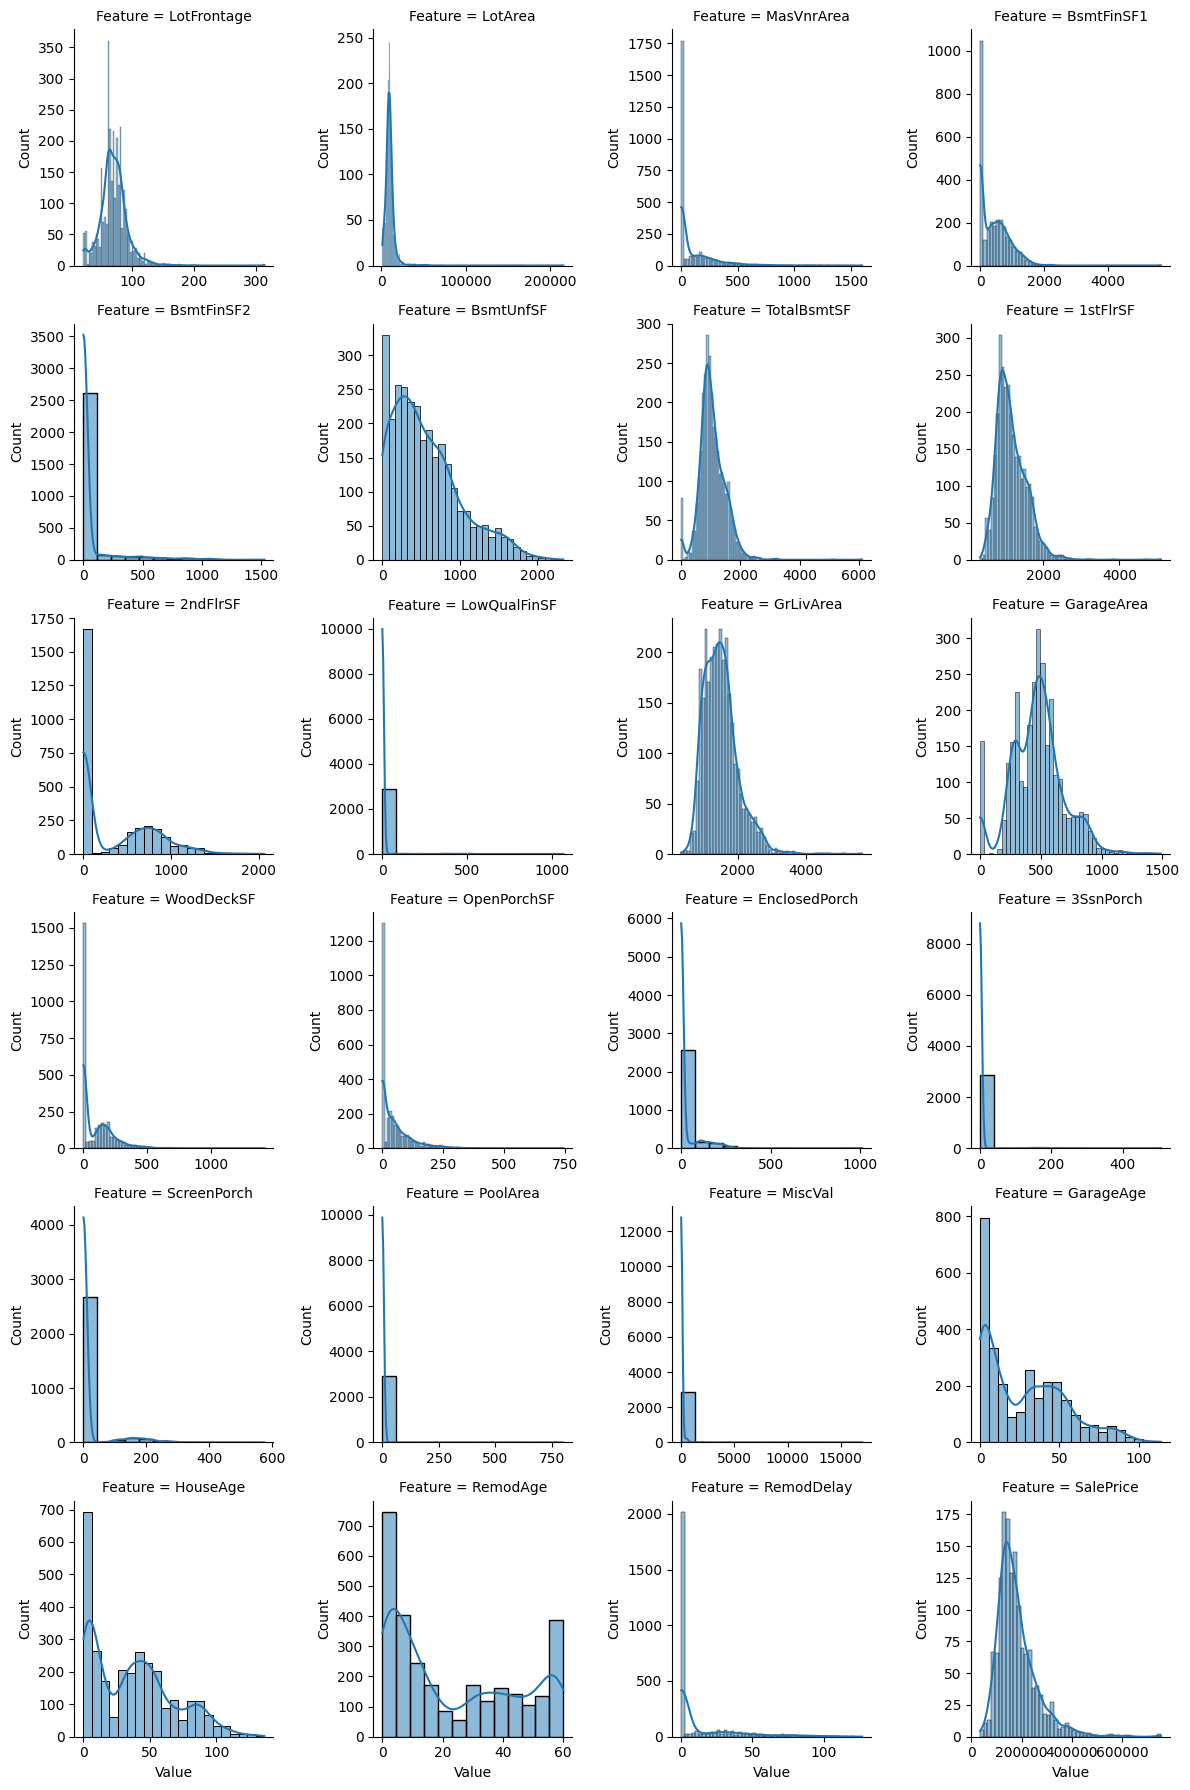

In [74]:

df_melted = merged_imputed_pro[numeric].melt(var_name='Feature', value_name='Value')
g = sns.FacetGrid(df_melted, col='Feature', col_wrap=4, height=3, sharex=False, sharey=False)
g.map(sns.histplot, 'Value', kde=True)
plt.tight_layout()
plt.show()

In [75]:
#log transformation of the skewed distributions
to_log=['LotArea','MasVnrArea','BsmtFinSF2','LowQualFinSF','3SsnPorch','ScreenPorch','PoolArea','MiscVal','OpenPorchSF','EnclosedPorch','RemodDelay']
for col in to_log:
  merged_imputed_pro[col]=np.log1p(merged_imputed_pro[col])

In [76]:
merged_imputed_pro[to_log]

LotArea  MasVnrArea  BsmtFinSF2  LowQualFinSF  3SsnPorch  \
train 0     9.042040    5.283204         0.0           0.0        0.0   
      1     9.169623    0.000000         0.0           0.0        0.0   
      2     9.328212    5.093750         0.0           0.0        0.0   
      3     9.164401    0.000000         0.0           0.0        0.0   
      4     9.565284    5.860786         0.0           0.0        0.0   
...              ...         ...         ...           ...        ...   
test  1454  7.568896    0.000000         0.0           0.0        0.0   
      1455  7.546974    0.000000         0.0           0.0        0.0   
      1456  9.903538    0.000000         0.0           0.0        0.0   
      1457  9.253591    0.000000         0.0           0.0        0.0   
      1458  9.172431    4.553877         0.0           0.0        0.0   

            ScreenPorch  PoolArea   MiscVal  OpenPorchSF  EnclosedPorch  \
train 0             0.0       0.0  0.000000     4.127134       0.000000   
      1             0.0       0.0  0.000000     0.000000       0.000000   
      2             0.0       0.0  0.000000     3.761200       0.000000   
      3             0.0       0.0  0.000000     3.583519       5.609472   
      4             0.0       0.0  0.000000     4.442651       0.000000   
...                 ...       ...       ...          ...            ...   
test  1454          0.0       0.0  0.000000     0.000000       0.000000   
      1455          0.0       0.0  0.000000     3.218876       0.000000   
      1456          0.0       0.0  0.000000     0.000000       0.000000   
      1457          0.0       0.0  6.552508     3.496508       0.000000   
      1458          0.0       0.0  0.000000     3.891820       0.000000   

            RemodDelay  
train 0       0.000000  
      1       0.000000  
      2       0.693147  
      3       4.025352  
      4       0.000000  
...                ...  
test  1454    0.000000  
      1455    0.000000  
      1456    3.610918  
      1457    0.000000  
      1458    0.693147  

[2919 rows x 11 columns]

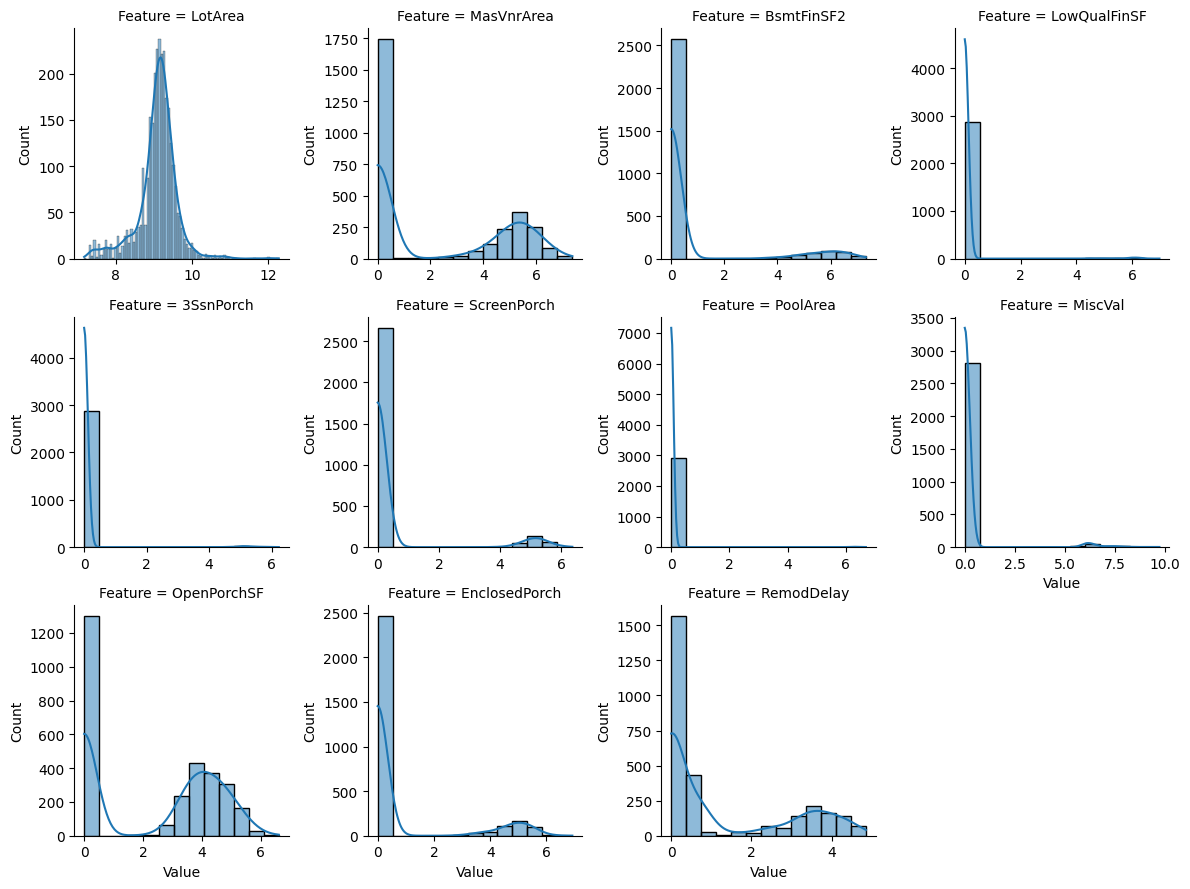

In [77]:
df_melted = merged_imputed_pro[to_log].melt(var_name='Feature', value_name='Value')
g = sns.FacetGrid(df_melted, col='Feature', col_wrap=4, height=3, sharex=False, sharey=False)
g.map(sns.histplot, 'Value', kde=True)
plt.tight_layout()
plt.show()

To understand the relationships between numerical variables in the dataset, a Pearson correlation heatmap was created. Pearson's method is especially appropriate here because:

It measures linear relationships between continuous variables.

It is sensitive to scale and distribution, which aligns well with the assumptions of linear regression.

It was applied after log transformation of skewed variables, making the correlation values more reliable and interpretable for linear modeling.

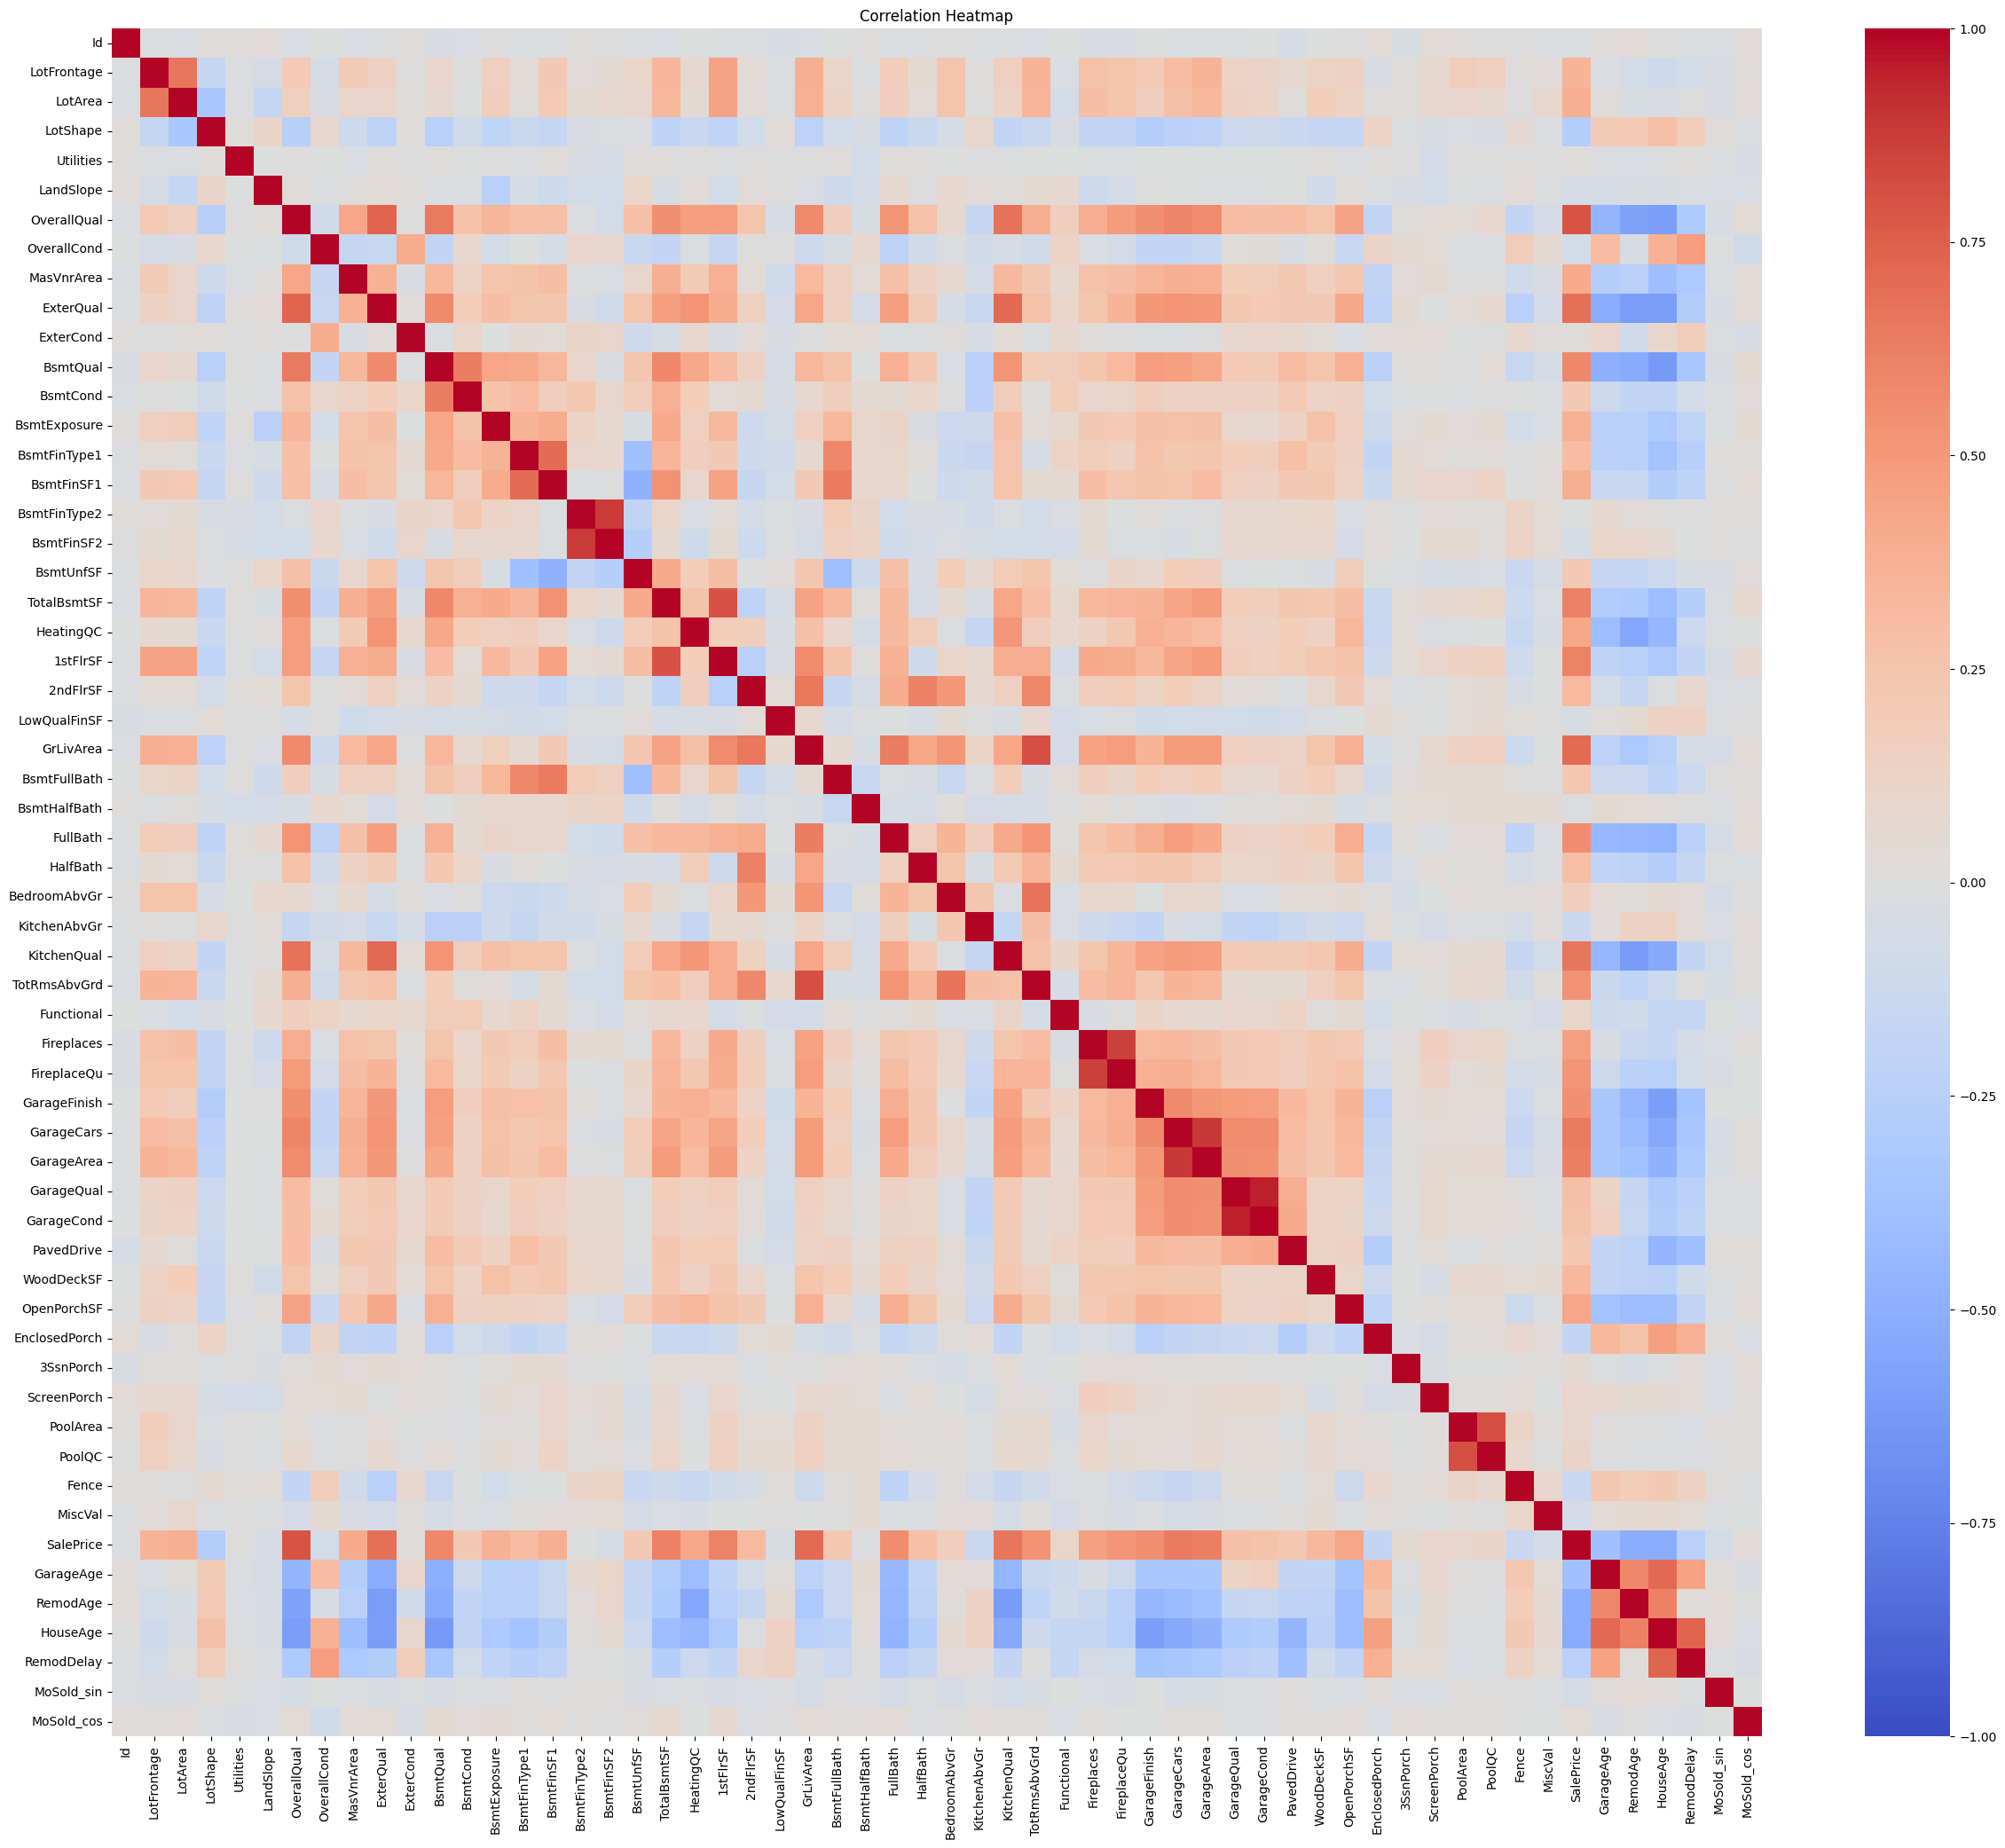

Feature1      Feature2      corr
0     BsmtFinType2    BsmtFinSF2  0.904212
1      FireplaceQu    Fireplaces  0.903822
2           PoolQC      PoolArea  0.876900
3       GarageCars    GarageArea  0.864929
4         1stFlrSF   TotalBsmtSF  0.828737
...            ...           ...       ...
1648      PoolArea     ExterCond  0.000350
1649    MoSold_sin  BsmtFullBath  0.000342
1650   OverallQual     Utilities  0.000315
1651      HalfBath    MoSold_sin  0.000058
1652     3SsnPorch    GarageCond  0.000003

[1653 rows x 3 columns]

In [78]:
corr_matrix2p = merged_imputed_pro.corr(numeric_only=True)
plt.figure(figsize=(30, 25))
sns.heatmap(corr_matrix2p, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()
corr_series2p=corr_matrix2p.unstack()
corr_series2p=corr_series2[corr_series2p != 1]
corr_series_abs2p= abs(corr_series2p)
sorted_corr2p=corr_series2p.sort_values(ascending=False)
sorted_corr_abs2p=corr_series_abs2p.sort_values(ascending=False)
sorted_corr_abs2p.drop_duplicates(inplace=True)
sorted_corr_abs2p=sorted_corr_abs2p.reset_index()
sorted_corr_abs2p.columns=['Feature1','Feature2','corr']
sorted_corr_abs2p

In [79]:
sale_corr=merged_imputed_pro.corr(numeric_only=True)['SalePrice'].abs().sort_values(ascending=False)
sale_corr

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
ExterQual        0.682639
KitchenQual      0.659600
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
BsmtQual         0.585207
FullBath         0.560664
GarageFinish     0.549247
TotRmsAbvGrd     0.533723
HouseAge         0.523350
FireplaceQu      0.520438
RemodAge         0.509096
Fireplaces       0.466929
OpenPorchSF      0.429970
HeatingQC        0.427649
MasVnrArea       0.412465
GarageAge        0.390053
LotArea          0.388528
BsmtFinSF1       0.386420
BsmtExposure     0.374696
LotFrontage      0.354519
WoodDeckSF       0.324413
2ndFlrSF         0.319334
BsmtFinType1     0.304908
HalfBath         0.284108
GarageQual       0.273839
LotShape         0.267759
GarageCond       0.263191
RemodDelay       0.235504
PavedDrive       0.231357
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BsmtCond         0.212607
EnclosedPorch    0.176065
BedroomAbvGr     0.168213
Fence            0.146942
KitchenAbvGr     0.135907
PoolQC           0.115484
Functional       0.107619
ScreenPorch      0.093910
PoolArea         0.093700
OverallCond      0.077856
MiscVal          0.063495
MoSold_sin       0.055101
LandSlope        0.051152
BsmtFinSF2       0.048267
3SsnPorch        0.047322
LowQualFinSF     0.044358
MoSold_cos       0.036300
Id               0.021917
ExterCond        0.018899
BsmtHalfBath     0.016844
Utilities        0.014314
BsmtFinType2     0.005323
Name: SalePrice, dtype: float64

In [80]:
sale_corr_j = merged_imputed_pro.corr(numeric_only=True)['SalePrice']
sale_corr_signed_sorted = sale_corr_j.loc[sale_corr.abs().sort_values(ascending=False).index]
sale_corr_signed_sorted


SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
ExterQual        0.682639
KitchenQual      0.659600
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
BsmtQual         0.585207
FullBath         0.560664
GarageFinish     0.549247
TotRmsAbvGrd     0.533723
HouseAge        -0.523350
FireplaceQu      0.520438
RemodAge        -0.509096
Fireplaces       0.466929
OpenPorchSF      0.429970
HeatingQC        0.427649
MasVnrArea       0.412465
GarageAge       -0.390053
LotArea          0.388528
BsmtFinSF1       0.386420
BsmtExposure     0.374696
LotFrontage      0.354519
WoodDeckSF       0.324413
2ndFlrSF         0.319334
BsmtFinType1     0.304908
HalfBath         0.284108
GarageQual       0.273839
LotShape        -0.267759
GarageCond       0.263191
RemodDelay      -0.235504
PavedDrive       0.231357
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BsmtCond         0.212607
EnclosedPorch   -0.176065
BedroomAbvGr     0.168213
Fence           -0.146942
KitchenAbvGr    -0.135907
PoolQC           0.115484
Functional       0.107619
ScreenPorch      0.093910
PoolArea         0.093700
OverallCond     -0.077856
MiscVal         -0.063495
MoSold_sin      -0.055101
LandSlope       -0.051152
BsmtFinSF2      -0.048267
3SsnPorch        0.047322
LowQualFinSF    -0.044358
MoSold_cos       0.036300
Id              -0.021917
ExterCond        0.018899
BsmtHalfBath    -0.016844
Utilities        0.014314
BsmtFinType2    -0.005323
Name: SalePrice, dtype: float64

In [81]:
sale_list= sale_corr[sale_corr>=0.1].index.to_list()
sale_list

['SalePrice',
 'OverallQual',
 'GrLivArea',
 'ExterQual',
 'KitchenQual',
 'GarageCars',
 'GarageArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'BsmtQual',
 'FullBath',
 'GarageFinish',
 'TotRmsAbvGrd',
 'HouseAge',
 'FireplaceQu',
 'RemodAge',
 'Fireplaces',
 'OpenPorchSF',
 'HeatingQC',
 'MasVnrArea',
 'GarageAge',
 'LotArea',
 'BsmtFinSF1',
 'BsmtExposure',
 'LotFrontage',
 'WoodDeckSF',
 '2ndFlrSF',
 'BsmtFinType1',
 'HalfBath',
 'GarageQual',
 'LotShape',
 'GarageCond',
 'RemodDelay',
 'PavedDrive',
 'BsmtFullBath',
 'BsmtUnfSF',
 'BsmtCond',
 'EnclosedPorch',
 'BedroomAbvGr',
 'Fence',
 'KitchenAbvGr',
 'PoolQC',
 'Functional']

In [82]:
#onehot encoding  of nominal columns
merged_onehot=pd.get_dummies(merged_imputed_pro, columns=nominal_cols, drop_first=True, dtype=int)
merged_onehot

Id  LotFrontage   LotArea  LotShape  Utilities  LandSlope  \
train 0        1         65.0  9.042040         4          4          3   
      1        2         80.0  9.169623         4          4          3   
      2        3         68.0  9.328212         3          4          3   
      3        4         60.0  9.164401         3          4          3   
      4        5         84.0  9.565284         3          4          3   
...          ...          ...       ...       ...        ...        ...   
test  1454  2915         21.0  7.568896         4          4          3   
      1455  2916         21.0  7.546974         4          4          3   
      1456  2917        160.0  9.903538         4          4          3   
      1457  2918         62.0  9.253591         4          4          3   
      1458  2919         74.0  9.172431         4          4          2   

            OverallQual  OverallCond  MasVnrArea  ExterQual  ...  \
train 0               7            5    5.283204          4  ...   
      1               6            8    0.000000          3  ...   
      2               7            5    5.093750          4  ...   
      3               7            5    0.000000          3  ...   
      4               8            5    5.860786          4  ...   
...                 ...          ...         ...        ...  ...   
test  1454            4            7    0.000000          3  ...   
      1455            4            5    0.000000          3  ...   
      1456            5            7    0.000000          3  ...   
      1457            5            5    0.000000          3  ...   
      1458            7            5    4.553877          3  ...   

            SaleType_ConLI  SaleType_ConLw  SaleType_New  SaleType_Oth  \
train 0                  0               0             0             0   
      1                  0               0             0             0   
      2                  0               0             0             0   
      3                  0               0             0             0   
      4                  0               0             0             0   
...                    ...             ...           ...           ...   
test  1454               0               0             0             0   
      1455               0               0             0             0   
      1456               0               0             0             0   
      1457               0               0             0             0   
      1458               0               0             0             0   

            SaleType_WD  SaleCondition_AdjLand  SaleCondition_Alloca  \
train 0               1                      0                     0   
      1               1                      0                     0   
      2               1                      0                     0   
      3               1                      0                     0   
      4               1                      0                     0   
...                 ...                    ...                   ...   
test  1454            1                      0                     0   
      1455            1                      0                     0   
      1456            1                      0                     0   
      1457            1                      0                     0   
      1458            1                      0                     0   

            SaleCondition_Family  SaleCondition_Normal  SaleCondition_Partial  
train 0                        0                     1                      0  
      1                        0                     1                      0  
      2                        0                     1                      0  
      3                        0                     0                      0  
      4                        0                     1                      0  
...                          ...                   ...        

exponentiating selected log‑transformed features back to their original scale, then useing Seaborn’s FacetGrid to create individual scatter plots with regression lines for each feature against SalePrice, facilitating quick visual assessment of their relationships.

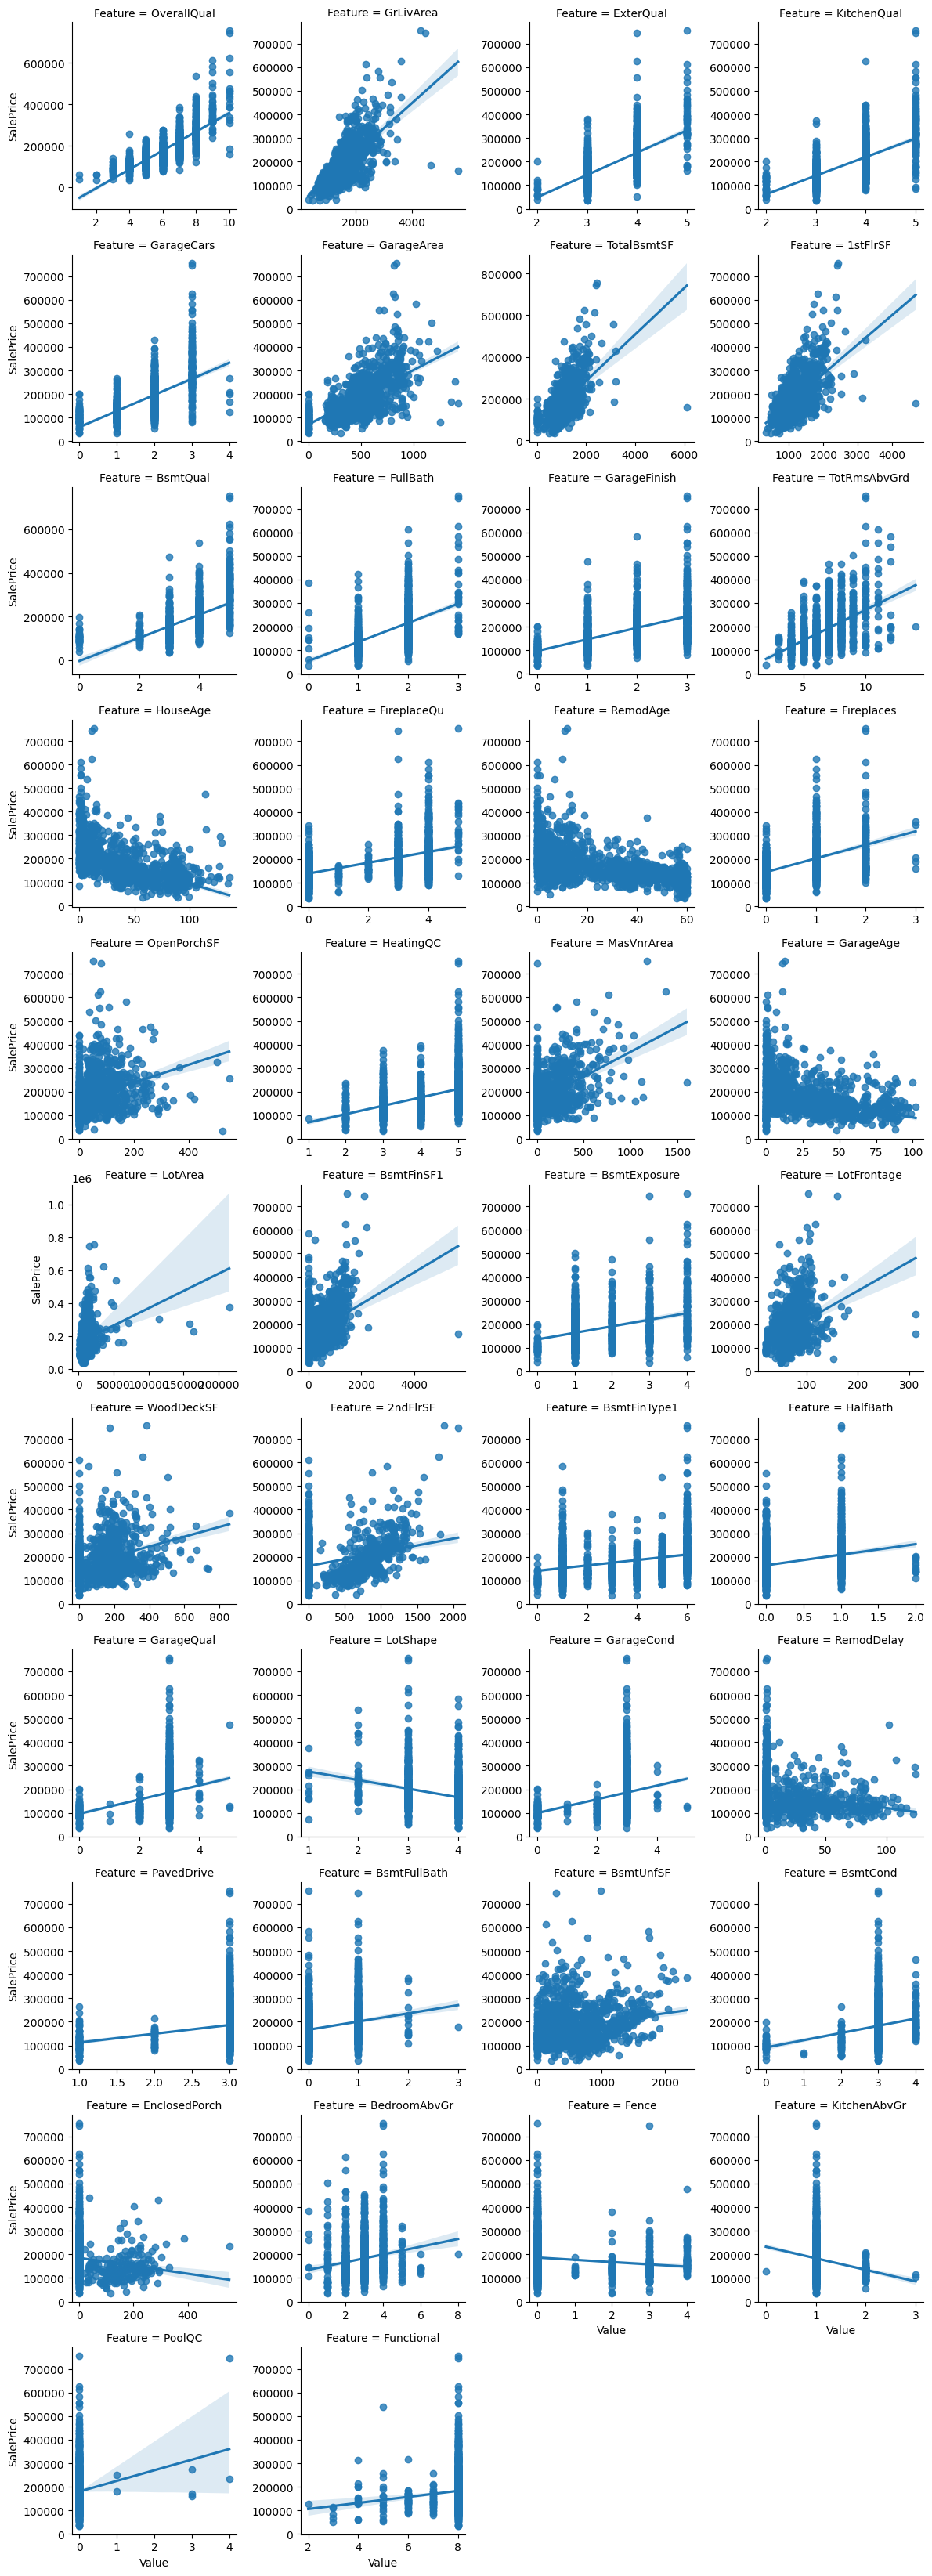

In [83]:
to_log=['LotArea','MasVnrArea','BsmtFinSF2','LowQualFinSF','3SsnPorch','ScreenPorch','PoolArea','MiscVal','OpenPorchSF','EnclosedPorch','RemodDelay']
for col in to_log:
  merged_imputed_pro[col]=np.exp(merged_imputed_pro[col])
df_melted_for_plot = merged_imputed_pro.melt(id_vars='SalePrice', value_vars=sale_list, var_name='Feature', value_name='Value')

# Create the FacetGrid using the melted DataFrame
# Now 'Feature' column is used to define the grid columns
g = sns.FacetGrid(df_melted_for_plot, col='Feature', col_wrap=4, height=3, sharex=False, sharey=False)

# Map the scatter plot to the grid. The x-axis will be the 'Value' (the feature values)
# and the y-axis will be 'SalePrice'.
g.map(sns.regplot, 'Value', 'SalePrice')

plt.tight_layout()
plt.show()

In [84]:
train=merged_onehot.loc['train']
test=merged_onehot.loc['test']
train

Id  LotFrontage   LotArea  LotShape  Utilities  LandSlope  \
0        1         65.0  9.042040         4          4          3   
1        2         80.0  9.169623         4          4          3   
2        3         68.0  9.328212         3          4          3   
3        4         60.0  9.164401         3          4          3   
4        5         84.0  9.565284         3          4          3   
...    ...          ...       ...       ...        ...        ...   
1455  1456         62.0  8.976894         4          4          3   
1456  1457         85.0  9.486152         4          4          3   
1457  1458         66.0  9.109746         4          4          3   
1458  1459         68.0  9.181735         4          4          3   
1459  1460         75.0  9.204121         4          4          3   

      OverallQual  OverallCond  MasVnrArea  ExterQual  ...  SaleType_ConLI  \
0               7            5    5.283204          4  ...               0   
1               6            8    0.000000          3  ...               0   
2               7            5    5.093750          4  ...               0   
3               7            5    0.000000          3  ...               0   
4               8            5    5.860786          4  ...               0   
...           ...          ...         ...        ...  ...             ...   
1455            6            5    0.000000          3  ...               0   
1456            6            6    4.787492          3  ...               0   
1457            7            9    0.000000          5  ...               0   
1458            5            6    0.000000          3  ...               0   
1459            5            6    0.000000          4  ...               0   

      SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0                  0             0             0            1   
1                  0             0             0            1   
2                  0             0             0            1   
3                  0             0             0            1   
4                  0             0             0            1   
...              ...           ...           ...          ...   
1455               0             0             0            1   
1456               0             0             0            1   
1457               0             0             0            1   
1458               0             0             0            1   
1459               0             0             0            1   

      SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                         0                     0                     0   
1                         0                     0                     0   
2                         0                     0                     0   
3                         0                     0                     0   
4                         0                     0                     0   
...                     ...                   ...                   ...   
1455                      0                     0                     0   
1456                      0                     0                     0   
1457                      0                     0                     0   
1458                      0                     0                     0   
1459                      0                     0                     0   

      SaleCondition_Normal  SaleCondition_Partial  
0                        1                      0  
1                        1                      0  
2                        1                      0  
3                        0                      0  
4                        1                      0  
...                    ...                    ...  
1455                     1                      0  
1456                     1                      0  
1457                     1                      0  
1458                     1              

<Axes: ylabel='SalePrice'>

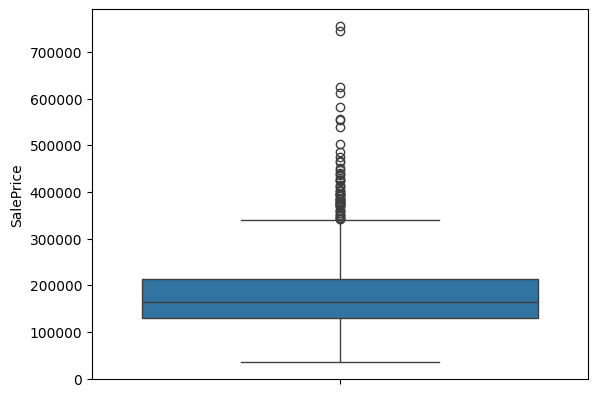

In [85]:
sns.boxplot(data=train['SalePrice'])

Training  and evaluating  four regression models—Linear, Ridge, Lasso, and ElasticNet—using a pipeline with StandardScaler, cross-validation, and hyperparameter tuning. Metrics like CV R², Test R², MAE, and RMSE are printed for each model to compare predictive performance. ElasticNet predictions are also visualized



🔹 Linear Regression:
CV R²: 0.8358143460138543
CV MSE: 0.025167345388562596
Test R²: 0.7993475900878388
Test MSE: 0.03744445215862716
MAE: 0.09316698025107803
RMSE: 0.19350569024870345

🔹 Ridge Regression:
Best alpha: 545.5594781168514
CV R²: 0.8694905725583025
CV MSE: 0.02021671084326933
Test R²: 0.8832547152507262
Test MSE: 0.021786248325914304
MAE: 0.09556277194622308
RMSE: 0.14760165421130722

🔹 Lasso Regression:
Best alpha: 0.00379269019073225
CV R²: 0.8634216567328619
CV MSE: 0.02121219866269882
Test R²: 0.8950910032395369
Test MSE: 0.01957743698132702
MAE: 0.08988523960487059
RMSE: 0.13991939458605093

🔹 ElasticNet Regression:
Best alpha: 0.004641588833612782
Best l1_ratio: 0.7000000000000001
CV R²: 0.8636602369492229
CV MSE: 0.02117133445859088
Test R²: 0.8956033777605262
Test MSE: 0.01948182096930463
MAE: 0.0892678252497067
RMSE: 0.13957729388874335


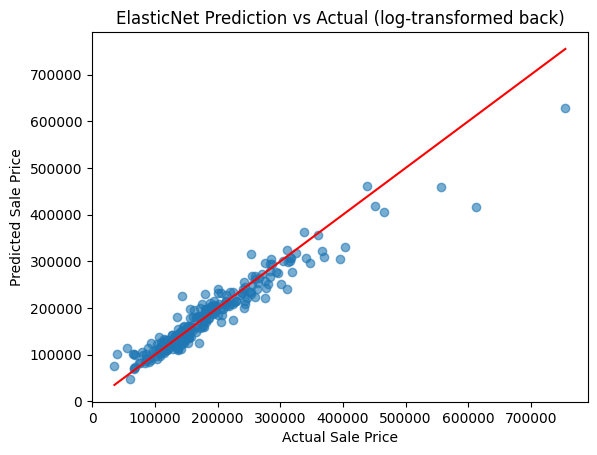

In [86]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# 1. Prepare data
X = train.drop(columns=['SalePrice'])
y = np.log(train['SalePrice'])  # log transform to reduce skew

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Cross-validation strategy
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# --- Helper function to compute CV MSE ---
def get_cv_mse(model, X, y, cv):
    mse_scores = -cross_val_score(model, X, y, cv=cv, scoring='neg_mean_squared_error')
    return np.mean(mse_scores)

# --- 1. Linear Regression ---
pipeline_lr = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LinearRegression())
])
pipeline_lr.fit(X_train, y_train)
y_pred_lr = pipeline_lr.predict(X_test)

print("\n🔹 Linear Regression:")
print("CV R²:", np.mean(cross_val_score(pipeline_lr, X_train, y_train, cv=cv, scoring='r2')))
print("CV MSE:", get_cv_mse(pipeline_lr, X_train, y_train, cv))
print("Test R²:", r2_score(y_test, y_pred_lr))
print("Test MSE:", mean_squared_error(y_test, y_pred_lr))
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))

# --- 2. Ridge Regression ---
param_grid_ridge = {'model__alpha': np.logspace(-4, 4, 20)}
pipeline_ridge = Pipeline([
    ('scaler', StandardScaler()),
    ('model', Ridge())
])
grid_ridge = GridSearchCV(pipeline_ridge, param_grid=param_grid_ridge, cv=cv, scoring='r2', n_jobs=-1)
grid_ridge.fit(X_train, y_train)
y_pred_ridge = grid_ridge.predict(X_test)

print("\n🔹 Ridge Regression:")
print("Best alpha:", grid_ridge.best_params_['model__alpha'])
print("CV R²:", grid_ridge.best_score_)
print("CV MSE:", get_cv_mse(grid_ridge.best_estimator_, X_train, y_train, cv))
print("Test R²:", r2_score(y_test, y_pred_ridge))
print("Test MSE:", mean_squared_error(y_test, y_pred_ridge))
print("MAE:", mean_absolute_error(y_test, y_pred_ridge))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_ridge)))

# --- 3. Lasso Regression ---
param_dist_lasso = {'model__alpha': np.logspace(-4, 1, 20)}
pipeline_lasso = Pipeline([
    ('scaler', StandardScaler()),
    ('model', Lasso(max_iter=10000))
])
lasso_search = RandomizedSearchCV(pipeline_lasso, param_distributions=param_dist_lasso, n_iter=20, cv=cv, scoring='r2', n_jobs=-1, random_state=42)
lasso_search.fit(X_train, y_train)
y_pred_lasso = lasso_search.predict(X_test)

print("\n🔹 Lasso Regression:")
print("Best alpha:", lasso_search.best_params_['model__alpha'])
print("CV R²:", lasso_search.best_score_)
print("CV MSE:", get_cv_mse(lasso_search.best_estimator_, X_train, y_train, cv))
print("Test R²:", r2_score(y_test, y_pred_lasso))
print("Test MSE:", mean_squared_error(y_test, y_pred_lasso))
print("MAE:", mean_absolute_error(y_test, y_pred_lasso))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lasso)))

# --- 4. ElasticNet Regression ---
param_dist_elastic = {
    'model__alpha': np.logspace(-4, 1, 10),
    'model__l1_ratio': np.linspace(0.1, 0.9, 9)
}
pipeline_elastic = Pipeline([
    ('scaler', StandardScaler()),
    ('model', ElasticNet(max_iter=10000))
])
elastic_search = RandomizedSearchCV(pipeline_elastic, param_distributions=param_dist_elastic, n_iter=30, cv=cv, scoring='r2', n_jobs=-1, random_state=42)
elastic_search.fit(X_train, y_train)
y_pred_elastic = elastic_search.predict(X_test)

print("\n🔹 ElasticNet Regression:")
print("Best alpha:", elastic_search.best_params_['model__alpha'])
print("Best l1_ratio:", elastic_search.best_params_['model__l1_ratio'])
print("CV R²:", elastic_search.best_score_)
print("CV MSE:", get_cv_mse(elastic_search.best_estimator_, X_train, y_train, cv))
print("Test R²:", r2_score(y_test, y_pred_elastic))
print("Test MSE:", mean_squared_error(y_test, y_pred_elastic))
print("MAE:", mean_absolute_error(y_test, y_pred_elastic))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_elastic)))

# Optional: Visualize best model predictions
plt.scatter(np.exp(y_test), np.exp(y_pred_elastic), alpha=0.6)
plt.xlabel("Actual Sale Price")
plt.ylabel("Predicted Sale Price")
plt.title("ElasticNet Prediction vs Actual (log-transformed back)")
plt.plot([min(np.exp(y_test)), max(np.exp(y_test))], [min(np.exp(y_test)), max(np.exp(y_test))], color='red')
plt.show()


iterating over two PCA settings—retaining 95% and 90% of variance—within a single loop. For each, it building a pipeline that standardizes features, applies PCA, and fits a Linear Regression model. It then reports test-set R², MAE, RMSE, cross-validated R², and the number of components selected, enabling efficient side-by-side comparison

In [87]:
from sklearn.decomposition import PCA

for variance in (0.95, 0.90):
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('pca', PCA(n_components=variance)),
        ('lr', LinearRegression())
    ])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    test_r2   = r2_score(y_test, y_pred)
    test_mae  = mean_absolute_error(y_test, y_pred)
    test_rmse = mean_squared_error(y_test, y_pred)
    cv_r2     = cross_val_score(pipeline, X, y, cv=5, scoring='r2').mean()
    n_comp    = pipeline.named_steps['pca'].n_components_

    print(f"\n🔹 PCA + Linear (retain {int(variance*100)}% variance):")
    print(f"R² Score (Test): {test_r2:.6f}")
    print(f"MAE:             {test_mae:.6f}")
    print(f"RMSE:            {test_rmse:.6f}")
    print(f"CV R² mean:      {cv_r2:.6f}")
    print(f"Components:      {n_comp}")



🔹 PCA + Linear (retain 95% variance):
R² Score (Test): 0.873296
MAE:             0.101253
RMSE:            0.023645
CV R² mean:      0.861228
Components:      134

🔹 PCA + Linear (retain 90% variance):
R² Score (Test): 0.871652
MAE:             0.101058
RMSE:            0.023952
CV R² mean:      0.860042
Components:      113


Appling Lasso and Ridge regression with Principal Component Analysis (PCA) to reduce dimensionality while retaining 90% of the variance. It uses RandomizedSearchCV to optimize the regularization strength (alpha) for both models. Performance is evaluated using R² score, Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), and cross-validated R² on the training data

In [88]:

# --- PCA + Lasso ---
pipeline_lasso_pca = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=0.90)),  # retain 90% variance
    ('lasso', Lasso(max_iter=10000))
])

# Hyperparameter tuning
param_dist_lasso = {'lasso__alpha': np.logspace(-4, 1, 30)}
search_lasso_pca = RandomizedSearchCV(
    pipeline_lasso_pca,
    param_distributions=param_dist_lasso,
    cv=5,
    scoring='r2',
    n_iter=30,
    random_state=42,
    n_jobs=-1,
    verbose=1
)
search_lasso_pca.fit(X_train, y_train)
y_pred_lasso_pca = search_lasso_pca.predict(X_test)

print("🔹 PCA + Lasso:")
print("Best alpha:", search_lasso_pca.best_params_['lasso__alpha'])
print("R² Score (Test):", r2_score(y_test, y_pred_lasso_pca))
print("MAE:", mean_absolute_error(y_test, y_pred_lasso_pca))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lasso_pca)))
print("Cross-validated R² mean:", np.mean(cross_val_score(search_lasso_pca.best_estimator_, X_train, y_train, cv=5)))

# --- PCA + Ridge ---
pipeline_ridge_pca = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=0.90)),  # retain 90% variance
    ('ridge', Ridge())
])

param_dist_ridge = {'ridge__alpha': np.logspace(-4, 4, 30)}
search_ridge_pca = RandomizedSearchCV(
    pipeline_ridge_pca,
    param_distributions=param_dist_ridge,
    cv=5,
    scoring='r2',
    n_iter=30,
    random_state=42,
    n_jobs=-1,
    verbose=1
)
search_ridge_pca.fit(X_train, y_train)
y_pred_ridge_pca = search_ridge_pca.predict(X_test)

print("\n🔹 PCA + Ridge:")
print("Best alpha:", search_ridge_pca.best_params_['ridge__alpha'])
print("R² Score (Test):", r2_score(y_test, y_pred_ridge_pca))
print("MAE:", mean_absolute_error(y_test, y_pred_ridge_pca))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_ridge_pca)))
print("Cross-validated R² mean:", np.mean(cross_val_score(search_ridge_pca.best_estimator_, X_train, y_train, cv=5)))


Fitting 5 folds for each of 30 candidates, totalling 150 fits
🔹 PCA + Lasso:
Best alpha: 0.005298316906283713
R² Score (Test): 0.8787533160001546
MAE: 0.09883411662090542
RMSE: 0.1504203120496095
Cross-validated R² mean: 0.8552435728429156
Fitting 5 folds for each of 30 candidates, totalling 150 fits

🔹 PCA + Ridge:
Best alpha: 417.53189365604004
R² Score (Test): 0.8735012998251968
MAE: 0.09988665126969681
RMSE: 0.15364363798545527
Cross-validated R² mean: 0.8538803736914579


based on there score we ideftify the best model which to predicit


| **Model**          | **CV R²** | **Test R²** | **MAE** | **RMSE** | **Notes**                                  |
| ------------------ | --------- | ----------- | ------- | -------- | ------------------------------------------ |
| Linear Regression  | 0.8358    | 0.7993      | 0.0932  | 0.1935   | No regularization                          |
| Ridge              | 0.8695    | 0.8833      | 0.0956  | 0.1476   | L2 regularization                          |
| Lasso              | 0.8634    | 0.8951      | 0.0899  | 0.1399   | L1 regularization                          |
| ElasticNet         | 0.8636    | 0.8956      | 0.0893  | 0.1396   | L1 + L2 regularization                     |
| PCA + Linear (90%) | 0.8600    | 0.8717      | 0.1011  | 0.1548   | PCA retained 90% variance (113 components) |
| PCA + Linear (95%) | 0.8612    | 0.8733      | 0.1013  | 0.1538   | PCA retained 95% variance (134 components) |
| PCA + Lasso        | 0.8552    | 0.8788      | 0.0988  | 0.1504   | PCA + L1                                   |
| PCA + Ridge        | 0.8539    | 0.8735      | 0.0999  | 0.1536   | PCA + L2                                   |


extracting the feature coefficients from the best-performing Lasso regression model. It identifies which features were retained (non-zero coefficients) versus those penalized to zero. The top 30 most influential features, based on the absolute value of their coefficients, are displayed in both a printed table and a horizontal bar plot to highlight their relative importance in predicting house prices.


✅ Lasso kept 88 features and penalized 130 to zero.

🔝 Top 15 Important Features (Lasso):
                   Feature  Coefficient
24               GrLivArea     0.095820
6              OverallQual     0.081294
37              GarageCars     0.040378
2                  LotArea     0.040280
7              OverallCond     0.030012
53                HouseAge    -0.029533
121        Condition2_PosN    -0.022297
101   Neighborhood_NridgHt     0.022242
11                BsmtQual     0.021057
25            BsmtFullBath     0.019871
14            BsmtFinType1     0.018391
91    Neighborhood_Crawfor     0.017507
57           MSSubClass_30    -0.016714
27                FullBath     0.016278
33              Functional     0.016194
35             FireplaceQu     0.015684
150    Exterior1st_BrkFace     0.015646
107   Neighborhood_StoneBr     0.015474
190           CentralAir_Y     0.014830
52                RemodAge    -0.014450
13            BsmtExposure     0.013846
106   Neighborhood_Somerst   

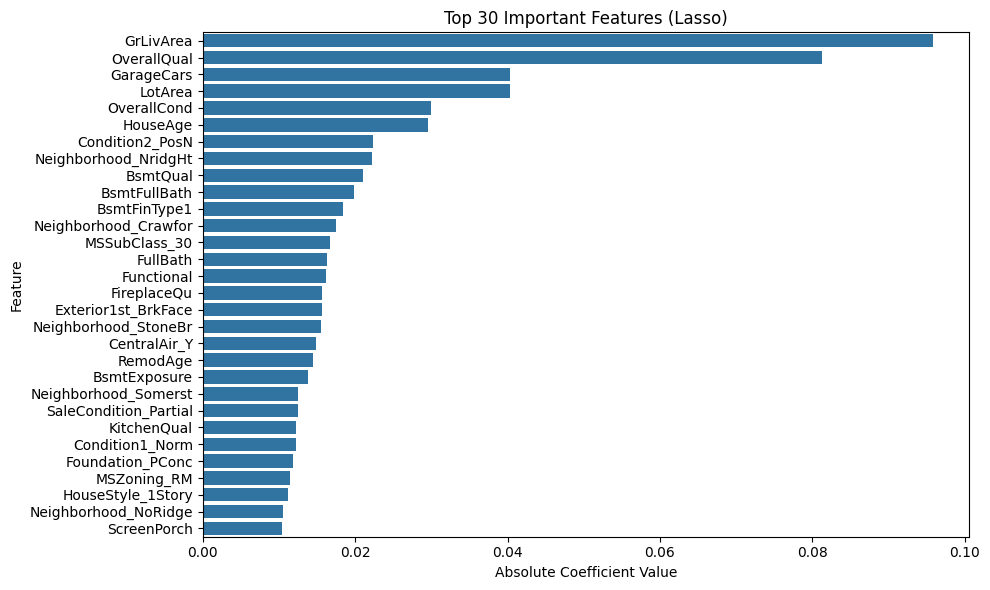

In [89]:
# Get model
best_lasso = lasso_search.best_estimator_

# Coefficients and feature names
coefficients = best_lasso.named_steps['model'].coef_
features = X_train.columns

# Build DataFrame
coef_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': coefficients
})
coef_df['Abs_Coefficient'] = coef_df['Coefficient'].abs()

# Separate into used vs. penalized
used_features = coef_df[coef_df['Coefficient'] != 0]
penalized_features = coef_df[coef_df['Coefficient'] == 0]

print(f"\n✅ Lasso kept {len(used_features)} features and penalized {len(penalized_features)} to zero.")

# Display top 15 by absolute weight
top_features = used_features.sort_values(by='Abs_Coefficient', ascending=False).head(30)

print("\n🔝 Top 15 Important Features (Lasso):")
print(top_features[['Feature', 'Coefficient']])

# Plot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(data=top_features, x='Abs_Coefficient', y='Feature')
plt.title('Top 30 Important Features (Lasso)')
plt.xlabel('Absolute Coefficient Value')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


using the best estimator of lasso to predict the test data set who doesnt have any sale price section at all

In [115]:
X=test.drop(columns=['SalePrice'])
# Predict log(SalePrice)
log_preds = best_lasso.predict(X)

# Convert from log to original SalePrice
final_preds_lasso = np.exp(log_preds)

# Create submission DataFrame
submission_lasso = test.copy()
submission_lasso['SalePrice'] = final_preds_lasso

submission_lasso['SalePrice']
submission_lasso=submission_lasso['SalePrice']
submission_lasso.index=test['Id']
submission_lasso

Id
1461    118722.588499
1462    153908.675128
1463    175172.297106
1464    193058.219672
1465    210749.076645
            ...      
2915     83588.808226
2916     80733.390437
2917    161306.658198
2918    119858.602607
2919    219535.648563
Name: SalePrice, Length: 1459, dtype: float64

Using the best estimator of elastic to predict the test data set who doesnt have any sale price section at all. since the elastic and lassso are the one woth a greate accuracy score out of all others that were tried.

In [114]:
# Predict log(SalePrice) using the best fitted ElasticNet pipeline from the search
best_elastic=elastic_search.best_estimator_
log_preds = best_elastic.predict(X)

# Convert from log to original SalePrice
final_preds_elastic = np.exp(log_preds)

# Create submission DataFrame
submission_elastic = test.copy()
submission_elastic['SalePrice'] = final_preds_elastic

submission_elastic=submission_elastic['SalePrice']
submission_elastic.index=test['Id']
submission_elastic


Id
1461    118928.053322
1462    154438.281864
1463    175212.632323
1464    192993.727045
1465    210613.069362
            ...      
2915     83113.962548
2916     79672.270446
2917    159652.825445
2918    119305.285463
2919    218893.761181
Name: SalePrice, Length: 1459, dtype: float64

Dual Feature Comparison (Correlation vs. Lasso Coefficients)

This section presents a side-by-side comparison between the Pearson correlation of features with the target variable (SalePrice) and their corresponding importance as determined by the Lasso regression model. Pearson correlation was used since linear regression assumes a linear relationship between variables, and the data was already log-transformed to ensure this assumption is reasonable. This comparison helps identify which features are both statistically correlated and predictive, offering more reliable insights for model interpretation.

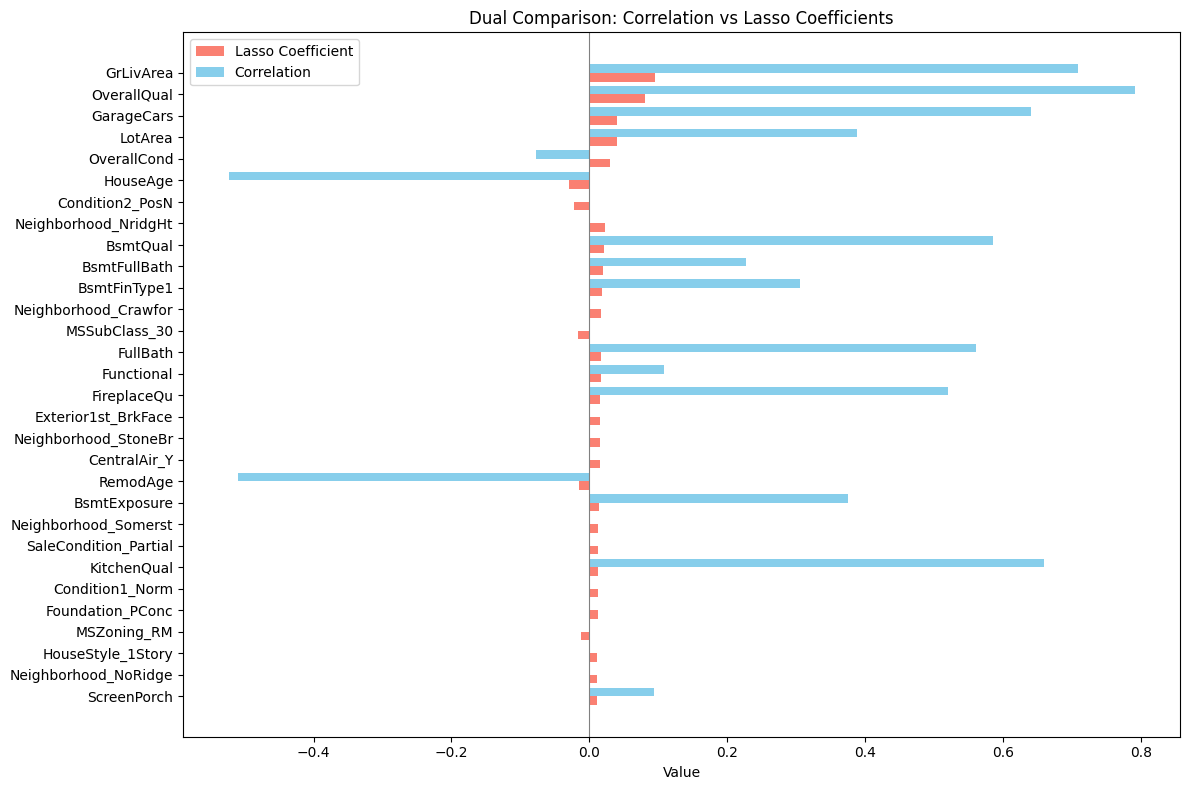

In [92]:
# sale_corr_signed_sorted: a Series with feature names as index and correlations as values
# top_features: a DataFrame with 'Feature' and 'Coefficient' columns from Lasso

# Step 1: Create DataFrame from correlation series
corr_df = sale_corr_signed_sorted.rename("Correlation").reset_index().rename(columns={"index": "Feature"})

# Step 2: Merge with Lasso coefficients
dual_df = pd.merge(top_features, corr_df, on="Feature", how="left")

# Step 3: Sort by absolute Lasso Coefficient (optional for visual clarity)
dual_df = dual_df.sort_values(by="Abs_Coefficient", ascending=False)

# Step 4: Plotting
plt.figure(figsize=(12, 8))
bar_width = 0.4
index = range(len(dual_df))

plt.barh([i + bar_width for i in index], dual_df['Coefficient'], height=bar_width, label='Lasso Coefficient', color='salmon')
plt.barh(index, dual_df['Correlation'], height=bar_width, label='Correlation', color='skyblue')

plt.yticks([i + bar_width / 2 for i in index], dual_df['Feature'])
plt.xlabel('Value')
plt.title('Dual Comparison: Correlation vs Lasso Coefficients')
plt.axvline(0, color='gray', linewidth=0.8)
plt.legend()
plt.tight_layout()
plt.gca().invert_yaxis()
plt.show()


lets try this prediction using other method of machine learning like random forest and see there accuracy score if they can have a better prediction.

In [93]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(X_train, y_train)
rf.score(X_test, y_test)


0.88442352898181

In [94]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the model
rf = RandomForestRegressor(random_state=42)

# Define the parameter distributions for random search
param_dist_rf = {
    'n_estimators': randint(100, 301),          # between 100 and 300
    'max_features': randint(10, 101),           # between 10 and 100
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': randint(2, 11),        # between 2 and 10
    'min_samples_leaf': randint(1, 5)           # between 1 and 4
}

# Set up Randomized Search
random_search_rf = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist_rf,
    n_iter=50,              # number of parameter settings sampled
    cv=5,
    scoring='r2',
    n_jobs=-1,
    random_state=42,
    return_train_score=True
)

# Fit the model
random_search_rf.fit(X_train, y_train)




RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20, 30],
                                        'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7c9142b46890>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7c9142935e10>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7c91429361d0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7c9142db9950>},
                   random_state=42, return_train_score=True, scoring='r2')

By hyperparameter tunning we have got a better r squared score even rom lassso by random forest

In [95]:
# Print results
print("Best parameters:", random_search_rf.best_params_)
print("Best R^2 score:", random_search_rf.best_score_)
print("Test R^2 score:", random_search_rf.score(X_test, y_test))
print("Best Cross-Validated MSE:",get_cv_mse(random_search_rf.best_estimator_, X_train, y_train, cv))


Best parameters: {'max_depth': None, 'max_features': 71, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 220}
Best R^2 score: 0.8724088587593879
Test R^2 score: 0.8868943040659201
Best Cross-Validated MSE: 0.0198680417445851



🔝 Top 30 Important Features (Random Forest):
OverallQual          0.232600
GrLivArea            0.127510
ExterQual            0.076685
HouseAge             0.069474
GarageCars           0.046296
GarageArea           0.039710
TotalBsmtSF          0.035257
KitchenQual          0.033840
1stFlrSF             0.032293
BsmtQual             0.021351
LotArea              0.019955
FullBath             0.019670
GarageFinish         0.017848
BsmtFinSF1           0.017705
FireplaceQu          0.014769
2ndFlrSF             0.013859
Fireplaces           0.013196
RemodAge             0.013035
LotFrontage          0.010908
CentralAir_Y         0.010861
OverallCond          0.007571
TotRmsAbvGrd         0.006266
OpenPorchSF          0.005860
BsmtUnfSF            0.005168
GarageCond           0.005105
GarageAge            0.004302
Id                   0.004025
GarageType_Attchd    0.003845
BsmtFinType1         0.003825
MasVnrArea           0.003643
dtype: float64


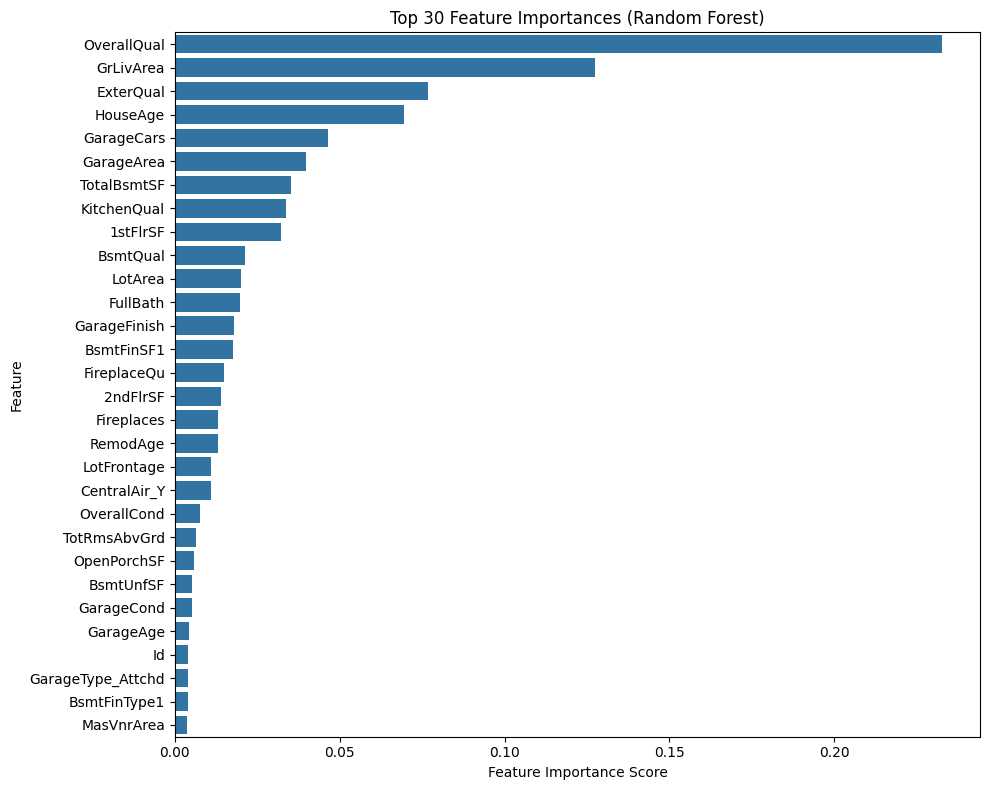

In [96]:
# Access the best fitted Random Forest model from the Grid Search object
best_rf_model = random_search_rf.best_estimator_

# Get feature importances from the best fitted model
# Ensure X_train.columns is available, which it should be from previous cells
importances = best_rf_model.feature_importances_

# Create a pandas Series
feature_importances = pd.Series(importances, index=X_train.columns)

# Sort the features by importance in descending order
sorted_feature_importances = feature_importances.sort_values(ascending=False)

# Select the top 30 features
top_30_features = sorted_feature_importances.head(30)

print("\n🔝 Top 30 Important Features (Random Forest):")
print(top_30_features)

# Plot the top 30 feature importances
plt.figure(figsize=(10, 8)) # Adjust figure size as needed
sns.barplot(x=top_30_features.values, y=top_30_features.index)
plt.title('Top 30 Feature Importances (Random Forest)')
plt.xlabel('Feature Importance Score')
plt.ylabel('Feature')
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

In [116]:
log_preds = best_rf_model.predict(X)

# Convert from log to original SalePrice
final_preds_rf= np.exp(log_preds)

# Create submission DataFrame
submission_rf = test.copy()
submission_rf['SalePrice'] = final_preds_rf

submission_rf=submission_rf['SalePrice']
submission_rf.index=test['Id']
submission_rf

Id
1461    123943.922996
1462    151901.697952
1463    181712.629391
1464    183343.240137
1465    203676.540799
            ...      
2915     87070.048259
2916     91048.056279
2917    160688.373269
2918    116486.807438
2919    225952.720273
Name: SalePrice, Length: 1459, dtype: float64

In [98]:
from google.colab import files
submission_rf.to_csv('submission_rf.csv', index=False)
submission_lasso.to_csv('submission_lasso.csv', index=False)
submission_elastic.to_csv('submission_elastic.csv', index=False)
files.download('submission_rf.csv')
files.download('submission_lasso.csv')
files.download('submission_elastic.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

applying xg boost to see the performance


In [99]:
import xgboost as xgb
xmodel=xgb.XGBRegressor()
xmodel.fit(X_train, y_train)
xmodel.score(X_test, y_test)

0.8901479490394667

In [100]:

from scipy.stats import uniform, randint
xmodel=xgb.XGBRegressor(random_state=42, objective='reg:squarederror')

# Define hyperparameter distribution
param_dist = {
    'n_estimators': randint(50, 300),
    'max_depth': randint(3, 10),
    'learning_rate': uniform(0.01, 0.3),
    'subsample': uniform(0.5, 0.5),
    'colsample_bytree': uniform(0.5, 0.5),
    'min_child_weight': randint(1, 10),
    'gamma': uniform(0, 5)
}

# Set up RandomizedSearchCV
random_search_xgb = RandomizedSearchCV(
    estimator=xmodel,
    param_distributions=param_dist,
    n_iter=30,
    cv=3,
    scoring='r2',
    n_jobs=-1,
    random_state=42,
    return_train_score=True
)

# Fit model
random_search_xgb.fit(X_train, y_train)
print("Best parameters:", random_search_xgb.best_params_)
print("Best CV R^2 score:", random_search_xgb.best_score_)
print("Test R^2 score:", random_search_xgb.score(X_test, y_test))
print("Best Cross-Validated MSE:",get_cv_mse(random_search_xgb.best_estimator_, X_train, y_train, cv))


Best parameters: {'colsample_bytree': np.float64(0.5035331526098588), 'gamma': np.float64(0.11531212520707879), 'learning_rate': np.float64(0.16743239807751675), 'max_depth': 9, 'min_child_weight': 3, 'n_estimators': 157, 'subsample': np.float64(0.7571172192068059)}
Best CV R^2 score: 0.876935262383602
Test R^2 score: 0.8932974462492346
Best Cross-Validated MSE: 0.019717907628439935



🔝 Top 30 Important Features (XGBoost):
OverallQual             0.143654
KitchenQual             0.135598
GarageCars              0.076143
CentralAir_Y            0.055865
ExterQual               0.047016
GrLivArea               0.043346
GarageType_Attchd       0.034985
GarageCond              0.031923
FireplaceQu             0.024875
Fireplaces              0.023223
HouseStyle_2Story       0.019053
HouseAge                0.016698
FullBath                0.012606
TotalBsmtSF             0.011019
MSZoning_RM             0.009637
LotShape                0.009318
RemodDelay              0.009257
GarageFinish            0.008931
GarageArea              0.008777
GarageType_Detchd       0.008473
BsmtFinSF1              0.008468
Neighborhood_Edwards    0.008406
BsmtFinType1            0.008360
RemodAge                0.008136
1stFlrSF                0.008108
2ndFlrSF                0.007386
GarageAge               0.006951
BsmtCond                0.006902
LotFrontage             0.006838
Enc

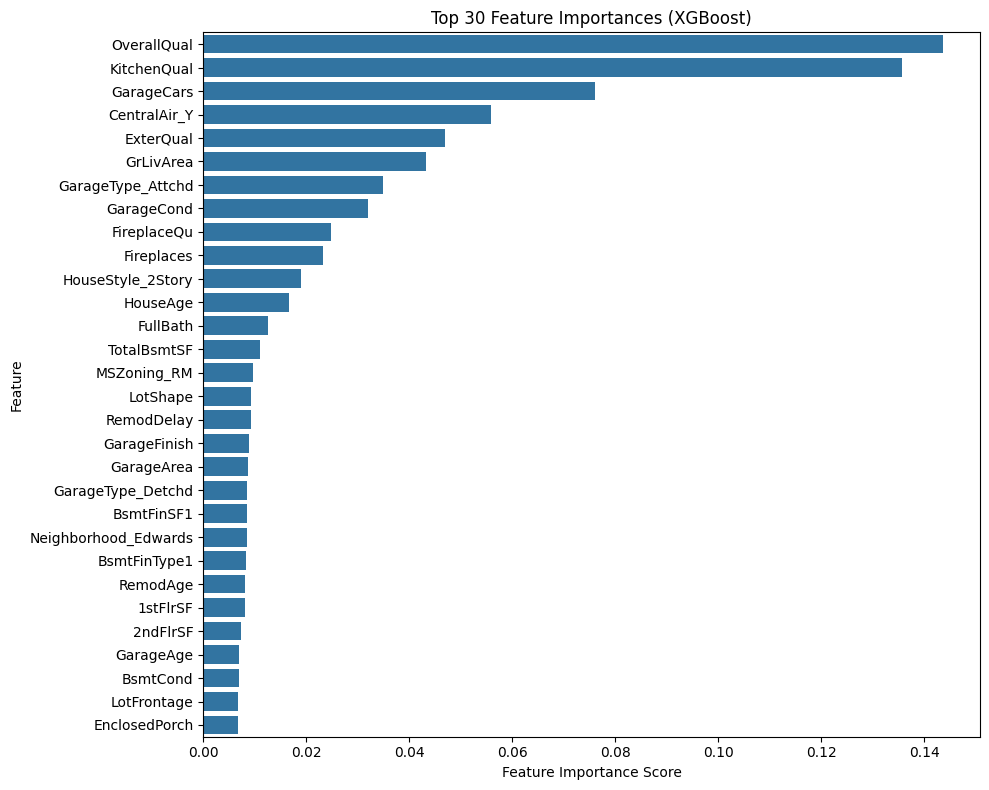

In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Access the best fitted XGBoost model from the RandomizedSearchCV object
best_xgb_model = random_search_xgb.best_estimator_

# Get feature importances from the best fitted XGBoost model
importances = best_xgb_model.feature_importances_

# Create a pandas Series with feature names (assuming X_train is a DataFrame)
feature_importances = pd.Series(importances, index=X_train.columns)

# Sort the features by importance in descending order
sorted_feature_importances = feature_importances.sort_values(ascending=False)

# Select the top 30 features
top_30_features = sorted_feature_importances.head(30)

print("\n🔝 Top 30 Important Features (XGBoost):")
print(top_30_features)

# Plot the top 30 feature importances
plt.figure(figsize=(10, 8))  # Adjust figure size as needed
sns.barplot(x=top_30_features.values, y=top_30_features.index)
plt.title('Top 30 Feature Importances (XGBoost)')
plt.xlabel('Feature Importance Score')
plt.ylabel('Feature')
plt.tight_layout()  # Adjust layout to prevent labels overlapping
plt.show()


In [117]:
log_preds = best_xgb_model.predict(X)

# Convert from log to original SalePrice
final_preds_xgb= np.exp(log_preds)

# Create submission DataFrame
submission_xgb= test.copy()
submission_xgb['SalePrice'] = final_preds_xgb

submission_xgb=submission_xgb['SalePrice']
submission_xgb.index=test['Id']
submission_xgb

Id
1461    126427.843750
1462    151449.875000
1463    176609.703125
1464    194040.312500
1465    195408.031250
            ...      
2915     84696.250000
2916     90330.296875
2917    169740.734375
2918    110839.773438
2919    211977.718750
Name: SalePrice, Length: 1459, dtype: float32

In [121]:
submission_xgb.to_csv('submission_xgb.csv', index=False)
files.download('submission_xgb.csv')
files.download('submission_rf.csv')
files.download('submission_lasso.csv')
files.download('submission_elastic.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Comparing Lasso,elastic  random forest and xgboost both by graph and table wise

/tmp/ipython-input-104-886052701.py:33: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


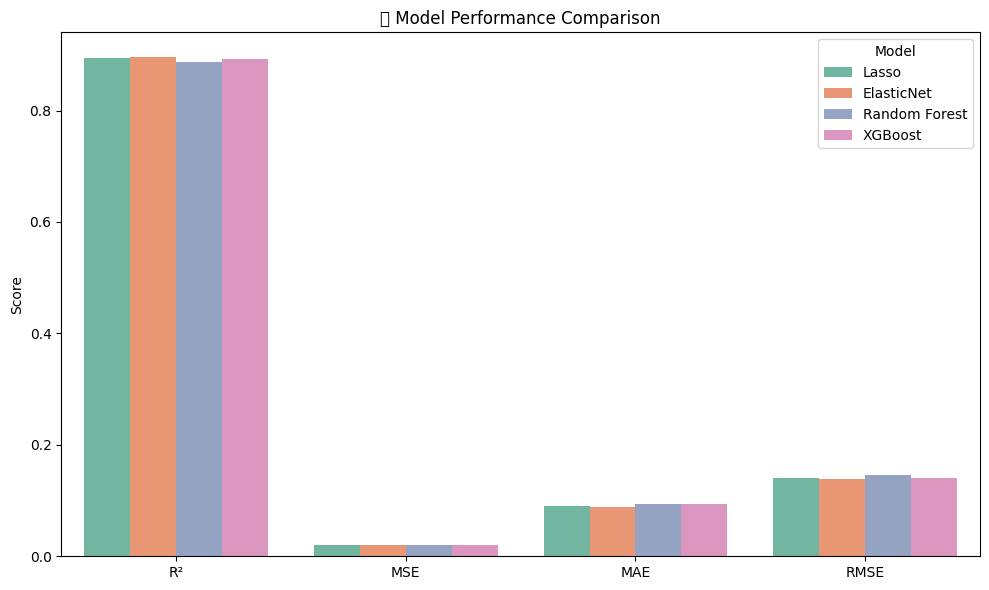

In [104]:
# Define models and their predictions
models = {
    'Lasso': lasso_search,
    'ElasticNet': elastic_search,
    'Random Forest': random_search_rf.best_estimator_,
    'XGBoost': random_search_xgb.best_estimator_
}

# Generate predictions and evaluate metrics
results = []

for name, model in models.items():
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    results.append({'Model': name, 'R²': r2, 'MSE': mse, 'MAE': mae, 'RMSE': rmse})

# Create DataFrame
metrics_df = pd.DataFrame(results)

# Melt for grouped bar plot
metrics_melted = metrics_df.melt(id_vars='Model', var_name='Metric', value_name='Score')

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=metrics_melted, x='Metric', y='Score', hue='Model', palette='Set2')
plt.title('📊 Model Performance Comparison')
plt.ylabel('Score')
plt.xlabel('')
plt.legend(title='Model')
plt.tight_layout()
plt.show()

In [105]:
import pandas as pd
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

# Define models and their predictions
models = {
    'Lasso': lasso_search,
    'ElasticNet': elastic_search,
    'Random Forest': random_search_rf.best_estimator_,
    'XGBoost': random_search_xgb.best_estimator_
}

# Generate predictions and evaluate metrics
results = []

for name, model in models.items():
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    results.append({'Model': name, 'R²': r2, 'MSE': mse, 'MAE': mae, 'RMSE': rmse})

# Create DataFrame
metrics_df = pd.DataFrame(results)

# Round the values for readability
metrics_df_rounded = metrics_df.round(4)

# Display table
print("\n📊 Model Performance Comparison (Test Set):")
print(metrics_df_rounded)



📊 Model Performance Comparison (Test Set):
           Model      R²     MSE     MAE    RMSE
0          Lasso  0.8951  0.0196  0.0899  0.1399
1     ElasticNet  0.8956  0.0195  0.0893  0.1396
2  Random Forest  0.8869  0.0211  0.0946  0.1453
3        XGBoost  0.8933  0.0199  0.0934  0.1411


From the above results of ElasticNet, Lasso, Random Forest, and XGBoost, we can conclude that ElasticNet is the best performing model.

ElasticNet outperformed Lasso, Random Forest, and XGBoost across all four test metrics.

While Lasso was a close second and XGBoost and Random Forest followed, ElasticNet demonstrated the best generalization to unseen data in this case, likely due to its combination of L1 and L2 regularization which effectively balances feature selection and coefficient shrinkage